# Clasificador de corredores de F1
Este trabajo tiene por objetivo que dado un gran dataset poder clasificar a los corredores de la formula 1, la idea es ocupar todo el conocimiento obtenido dentro del curso para lograr llegar a este objetivo.
Para esto, la plataforma tiene algunas preguntas a responder, las cuales son:
- ¿Qué tipo de preguntas sobre ciencia de datos puedes responder en función de tus datos?
puedo generar algunos algoritmos de clasificación y compararlos entre ellos, junto con que tipo de algoritmo entrega un mejor recall al ser optimizado
- ¿Es esta una tarea supervisada o no supervisada?
Como tal, no tiene una columna target, pero yo voy a hacer la columna target definiendo los corredores
- Si se trata de una tarea supervisada, ¿es una tarea de regresión o clasificación?
De clasificación
- ¿Qué tan limpios están tus datos?
yo espero q lo más limpio posibles
- ¿Qué problemas crees que pueden surgir?
quizas en temas de tiempo se demore bastante, debido a la dimension del dataset

# exploración de datos

## importando las librerias a usar

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.preprocessing import StandardScaler
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier,BaggingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import roc_auc_score, plot_roc_curve
from sklearn.model_selection import GridSearchCV

## cargando la data

Las ubicaciones

In [3]:
archivo1='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/results.csv'
archivo2='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/status.csv'
archivo3='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/drivers.csv'
archivo4='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/constructors.csv'
archivo5='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/driver_standings.csv'
archivo6='/Users/matiasinostrozacifuentes/Desktop/python_intro/F1_ML_classifier/Data/races.csv'

Cargandolas

In [4]:
resultados=pd.read_csv(archivo1)
Estado=pd.read_csv(archivo2)
drivers=pd.read_csv(archivo3)
cosntructors=pd.read_csv(archivo4)
standing=pd.read_csv(archivo5)
races=pd.read_csv(archivo6)

In [5]:
pd.get_option("display.max_columns",None)

20

primer vistazo

In [6]:
resultados.head()

,resultId,raceId,driverId,constructorId,number,grid,position,positionText,positionOrder,points,laps,time,milliseconds,fastestLap,rank,fastestLapTime,fastestLapSpeed,statusId
0,1,18,1,1,22,1,1,1,1,10.0,58,1:34:50.616,5690616,39,2,1:27.452,218.300,1
1,2,18,2,2,3,5,2,2,2,8.0,58,+5.478,5696094,41,3,1:27.739,217.586,1
2,3,18,3,3,7,7,3,3,3,6.0,58,+8.163,5698779,41,5,1:28.090,216.719,1
3,4,18,4,4,5,11,4,4,4,5.0,58,+17.181,5707797,58,7,1:28.603,215.464,1
4,5,18,5,1,23,3,5,5,5,4.0,58,+18.014,5708630,43,1,1:27.418,218.385,1


In [7]:
Estado.head()

,statusId,status
0,1,Finished
1,2,Disqualified
2,3,Accident
3,4,Collision
4,5,Engine


In [8]:
drivers.head()

,driverId,driverRef,number,code,forename,surname,dob,nationality,url
0,1,hamilton,44,HAM,Lewis,Hamilton,1985-01-07,British,http://en.wikipedia.org/wiki/Lewis_Hamilton
1,2,heidfeld,\N,HEI,Nick,Heidfeld,1977-05-10,German,http://en.wikipedia.org/wiki/Nick_Heidfeld
2,3,rosberg,6,ROS,Nico,Rosberg,1985-06-27,German,http://en.wikipedia.org/wiki/Nico_Rosberg
3,4,alonso,14,ALO,Fernando,Alonso,1981-07-29,Spanish,http://en.wikipedia.org/wiki/Fernando_Alonso
4,5,kovalainen,\N,KOV,Heikki,Kovalainen,1981-10-19,Finnish,http://en.wikipedia.org/wiki/Heikki_Kovalainen


In [9]:
cosntructors.head()

,constructorId,constructorRef,name,nationality,url
0,1,mclaren,McLaren,British,http://en.wikipedia.org/wiki/McLaren
1,2,bmw_sauber,BMW Sauber,German,http://en.wikipedia.org/wiki/BMW_Sauber
2,3,williams,Williams,British,http://en.wikipedia.org/wiki/Williams_Grand_Pr...
3,4,renault,Renault,French,http://en.wikipedia.org/wiki/Renault_in_Formul...
4,5,toro_rosso,Toro Rosso,Italian,http://en.wikipedia.org/wiki/Scuderia_Toro_Rosso


In [10]:
standing.head()

,driverStandingsId,raceId,driverId,points,position,positionText,wins
0,1,18,1,10.0,1,1,1
1,2,18,2,8.0,2,2,0
2,3,18,3,6.0,3,3,0
3,4,18,4,5.0,4,4,0
4,5,18,5,4.0,5,5,0


In [11]:
races.head()

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...


A primera impresion hay algunas columnas que hay que eliminar como el url dado a que solo dificultarian en el proceso de trabajo

Revisando si hay NaN

In [12]:
resultados
Estado
drivers
cosntructors
standing
races

,raceId,year,round,circuitId,name,date,time,url
0,1,2009,1,1,Australian Grand Prix,29/03/09,6:00:00,http://en.wikipedia.org/wiki/2009_Australian_G...
1,2,2009,2,2,Malaysian Grand Prix,05/04/09,9:00:00,http://en.wikipedia.org/wiki/2009_Malaysian_Gr...
2,3,2009,3,17,Chinese Grand Prix,19/04/09,7:00:00,http://en.wikipedia.org/wiki/2009_Chinese_Gran...
3,4,2009,4,3,Bahrain Grand Prix,26/04/09,12:00:00,http://en.wikipedia.org/wiki/2009_Bahrain_Gran...
4,5,2009,5,4,Spanish Grand Prix,10/05/09,12:00:00,http://en.wikipedia.org/wiki/2009_Spanish_Gran...
...,...,...,...,...,...,...,...,...
1074,1092,2022,18,22,Japanese Grand Prix,09/10/22,5:00:00,http://en.wikipedia.org/wiki/2022_Japanese_Gra...
1075,1093,2022,19,69,United States Grand Prix,23/10/22,19:00:00,http://en.wikipedia.org/wiki/2022_United_State...
1076,1094,2022,20,32,Mexico City Grand Prix,30/10/22,20:00:00,http://en.wikipedia.org/wiki/2022_Mexican_Gran...
1077,1095,2022,21,18,Brazilian Grand Prix,13/11/22,18:00:00,http://en.wikipedia.org/wiki/2022_Brazilian_Gr...


In [13]:
resultados.isna().sum()


resultId           0
raceId             0
driverId           0
constructorId      0
number             0
grid               0
position           0
positionText       0
positionOrder      0
points             0
laps               0
time               0
milliseconds       0
fastestLap         0
rank               0
fastestLapTime     0
fastestLapSpeed    0
statusId           0
dtype: int64

In [14]:
Estado.isna().sum()


statusId    0
status      0
dtype: int64

In [15]:
drivers.isna().sum()


driverId       0
driverRef      0
number         0
code           0
forename       0
surname        0
dob            0
nationality    0
url            0
dtype: int64

In [16]:
cosntructors.isna().sum()


constructorId     0
constructorRef    0
name              0
nationality       0
url               0
dtype: int64

In [17]:
standing.isna().sum()


driverStandingsId    0
raceId               0
driverId             0
points               0
position             0
positionText         0
wins                 0
dtype: int64

In [18]:
races.isna().sum()

raceId       0
year         0
round        0
circuitId    0
name         0
date         0
time         0
url          0
dtype: int64

no hay NAN, se eliminaran duplicados

In [19]:
resultados.drop_duplicates(inplace=True)


In [20]:
Estado.drop_duplicates(inplace=True)


In [21]:
drivers.drop_duplicates(inplace=True)


In [22]:
cosntructors.drop_duplicates(inplace=True)


In [23]:
standing.drop_duplicates(inplace=True)


In [24]:
races.drop_duplicates(inplace=True)

In [25]:
bases=[resultados,
Estado,
drivers,
cosntructors,
standing,
races]

In [26]:
for i in range(6):
    print(bases[i].info())

<class 'pandas.core.frame.DataFrame'>
Int64Index: 25460 entries, 0 to 25459
Data columns (total 18 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   resultId         25460 non-null  int64  
 1   raceId           25460 non-null  int64  
 2   driverId         25460 non-null  int64  
 3   constructorId    25460 non-null  int64  
 4   number           25460 non-null  object 
 5   grid             25460 non-null  int64  
 6   position         25460 non-null  object 
 7   positionText     25460 non-null  object 
 8   positionOrder    25460 non-null  int64  
 9   points           25460 non-null  float64
 10  laps             25460 non-null  int64  
 11  time             25460 non-null  object 
 12  milliseconds     25460 non-null  object 
 13  fastestLap       25460 non-null  object 
 14  rank             25460 non-null  object 
 15  fastestLapTime   25460 non-null  object 
 16  fastestLapSpeed  25460 non-null  object 
 17  statusId    

En todas las bases que contengan la columna URL se eliminará

In [27]:
races.drop(columns=['url'],inplace=True)
drivers.drop(columns=['url'],inplace=True)
cosntructors.drop(columns=['url'],inplace=True)

Ahora generando un dataframe que contenga a todos los sub dataframes

Revisar la forma de union

In [28]:
con1 = pd.merge(resultados, races, on ='raceId')
con2 = pd.merge(con1, drivers, on = 'driverId')
con3 = pd.merge(con2, standing, on = 'driverId')
con4 = pd.merge(con3, cosntructors, on ='constructorId')
df = pd.merge(con4, Estado, on ='statusId')
pd.get_option("display.max_columns",None)
df.head()

,resultId,raceId_x,driverId,constructorId,number_x,grid,position_x,positionText_x,positionOrder,points_x,...,driverStandingsId,raceId_y,points_y,position_y,positionText_y,wins,constructorRef,name_y,nationality_y,status
0,1,18,1,1,22,1,1,1,1,10.0,...,1,18,10.0,1,1,1,mclaren,McLaren,British,Finished
1,1,18,1,1,22,1,1,1,1,10.0,...,9,19,14.0,1,1,1,mclaren,McLaren,British,Finished
2,1,18,1,1,22,1,1,1,1,10.0,...,27,20,14.0,3,3,1,mclaren,McLaren,British,Finished
3,1,18,1,1,22,1,1,1,1,10.0,...,48,21,20.0,2,2,1,mclaren,McLaren,British,Finished
4,1,18,1,1,22,1,1,1,1,10.0,...,69,22,28.0,3,3,1,mclaren,McLaren,British,Finished


In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364731 entries, 0 to 3364730
Data columns (total 41 columns):
 #   Column             Dtype  
---  ------             -----  
 0   resultId           int64  
 1   raceId_x           int64  
 2   driverId           int64  
 3   constructorId      int64  
 4   number_x           object 
 5   grid               int64  
 6   position_x         object 
 7   positionText_x     object 
 8   positionOrder      int64  
 9   points_x           float64
 10  laps               int64  
 11  time_x             object 
 12  milliseconds       object 
 13  fastestLap         object 
 14  rank               object 
 15  fastestLapTime     object 
 16  fastestLapSpeed    object 
 17  statusId           int64  
 18  year               int64  
 19  round              int64  
 20  circuitId          int64  
 21  name_x             object 
 22  date               object 
 23  time_y             object 
 24  driverRef          object 
 25  number_y          

Checkeando que no hayan quedado NaN

In [30]:
df.isna().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
year                 0
round                0
circuitId            0
name_x               0
date                 0
time_y               0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
driverStandingsId    0
raceId_y             0
points_y             0
position_y           0
positionText_y       0
wins                 0
constructorRef       0
name_y               0
nationality_y        0
status               0
dtype: int64

In [31]:
df.isnull().sum()

resultId             0
raceId_x             0
driverId             0
constructorId        0
number_x             0
grid                 0
position_x           0
positionText_x       0
positionOrder        0
points_x             0
laps                 0
time_x               0
milliseconds         0
fastestLap           0
rank                 0
fastestLapTime       0
fastestLapSpeed      0
statusId             0
year                 0
round                0
circuitId            0
name_x               0
date                 0
time_y               0
driverRef            0
number_y             0
code                 0
forename             0
surname              0
dob                  0
nationality_x        0
driverStandingsId    0
raceId_y             0
points_y             0
position_y           0
positionText_y       0
wins                 0
constructorRef       0
name_y               0
nationality_y        0
status               0
dtype: int64

No hay NaN en la union de los dataframes, ahora se eliminaran duplicados

In [33]:
df.duplicated().sum()

0

No habian duplicados, por lo que no se debe realizar nada por el estilo

ahora se deben eliminar columnas que son innecesarias para el objetivo que se busca

In [34]:
df.drop(columns=['position_x','fastestLapTime','positionText_x','time_x','time_y','driverRef',
              'constructorRef','nationality_y','positionText_y','raceId_y','points_y'],inplace=True)

In [35]:
df.columns

Index(['resultId', 'raceId_x', 'driverId', 'constructorId', 'number_x', 'grid',
       'positionOrder', 'points_x', 'laps', 'milliseconds', 'fastestLap',
       'rank', 'fastestLapSpeed', 'statusId', 'year', 'round', 'circuitId',
       'name_x', 'date', 'number_y', 'code', 'forename', 'surname', 'dob',
       'nationality_x', 'driverStandingsId', 'position_y', 'wins', 'name_y',
       'status'],
      dtype='object')

In [36]:
df.shape

(3364731, 30)

ahora hay que transformar las siguientes columnas aun formato para poder usar 
- date
- dob (día de nacimiento)

además se va a crear una columna de la edad del corredor y se asignará a una nueva columna

junto con que se va a juntar las columnas de forename y surname en una sola

In [37]:
df['date']=pd.to_datetime(df['date'])
df['dob']=pd.to_datetime(df['dob'])

In [38]:
from datetime import datetime

In [39]:
Tiempo=datetime.now().year-df['dob'].dt.year #generar con .year pero con now
Años=round(Tiempo)
Años.value_counts()

41     203391
37     139418
63     131879
43     129047
35     114744
        ...  
115       162
124       121
114        58
122        56
120        31
Name: dob, Length: 103, dtype: int64

In [40]:
df['Edad']=Años

In [41]:
df.drop(columns=['forename','surname'],inplace=True)

In [42]:
df.shape

(3364731, 29)

In [43]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3364731 entries, 0 to 3364730
Data columns (total 29 columns):
 #   Column             Dtype         
---  ------             -----         
 0   resultId           int64         
 1   raceId_x           int64         
 2   driverId           int64         
 3   constructorId      int64         
 4   number_x           object        
 5   grid               int64         
 6   positionOrder      int64         
 7   points_x           float64       
 8   laps               int64         
 9   milliseconds       object        
 10  fastestLap         object        
 11  rank               object        
 12  fastestLapSpeed    object        
 13  statusId           int64         
 14  year               int64         
 15  round              int64         
 16  circuitId          int64         
 17  name_x             object        
 18  date               datetime64[ns]
 19  number_y           object        
 20  code               objec

In [44]:
col_name = {'number_x':'number','milliseconds':'timetaken_in_millisec','fastestLapSpeed':'max_speed',
 'name_x':'grand_prix','number_y':'driver_num','code':'driver_code','nationality_x':'nationality','name_y':'company',
 'raceId_x':'racerId','points_x':'points','position_y':'position'}

df.rename(columns=col_name,inplace=True)

Borrando algunas filas innecesarias

In [43]:
df.columns

Index(['resultId', 'racerId', 'driverId', 'constructorId', 'number', 'grid',
       'positionOrder', 'points', 'laps', 'timetaken_in_millisec',
       'fastestLap', 'rank', 'max_speed', 'statusId', 'year', 'round',
       'circuitId', 'grand_prix', 'date', 'driver_num', 'driver_code', 'dob',
       'nationality', 'driverStandingsId', 'position', 'wins', 'company',
       'status', 'Edad'],
      dtype='object')

In [45]:
df.drop(columns=['resultId','racerId','constructorId','statusId','circuitId','driverStandingsId'],inplace=True)

In [46]:
df['wins'].value_counts()

0     2633838
1      330288
2      158109
3       81946
4       51807
5       36294
6       28965
7       14125
8        9069
9        8964
10       5430
11       3486
12       1513
13        897
Name: wins, dtype: int64

Ahora revisando las primeras impresiones de las variables numericas

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
driverId,3364731.0,184.762399,243.400286,1.0,20.0,102.0,212.0,855.0
grid,3364731.0,9.810997,6.597413,0.0,4.0,9.0,15.0,34.0
positionOrder,3364731.0,11.331430,7.431728,1.0,5.0,10.0,17.0,39.0
points,3364731.0,2.819503,5.122316,0.0,0.0,0.0,4.0,50.0
laps,3364731.0,48.028090,25.426385,0.0,31.0,54.0,67.0,200.0
year,3364731.0,1995.242811,16.915292,1950.0,1983.0,1997.0,2010.0,2022.0
round,3364731.0,8.778851,5.053300,1.0,4.0,8.0,13.0,22.0
position,3364731.0,11.795840,9.253396,1.0,5.0,10.0,17.0,108.0
wins,3364731.0,0.543698,1.423434,0.0,0.0,0.0,0.0,13.0
Edad,3364731.0,56.948647,18.477998,22.0,42.0,54.0,70.0,126.0


Lo que más llama la atención son los corredores que tienen más de 54 años, debido a que los corredores se tienden a retirar antes de los 45 años, por ende los corredores de mayor edad se consideraran fuera del algoritmo

In [48]:
df=df.loc[df['Edad']<45,:]
df

,driverId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,...,date,driver_num,driver_code,dob,nationality,position,wins,company,status,Edad
0,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,1,1,McLaren,Finished,37
1,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,1,1,McLaren,Finished,37
2,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,3,1,McLaren,Finished,37
3,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,2,1,McLaren,Finished,37
4,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,3,1,McLaren,Finished,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3363264,853,9,20,20,0.0,0,\N,\N,0,\N,...,2021-12-12,9,MAZ,1999-03-02,Russian,21,0,Haas F1 Team,Illness,23
3363265,853,9,20,20,0.0,0,\N,\N,0,\N,...,2021-12-12,9,MAZ,1999-03-02,Russian,21,0,Haas F1 Team,Illness,23
3363266,853,9,20,20,0.0,0,\N,\N,0,\N,...,2021-12-12,9,MAZ,1999-03-02,Russian,21,0,Haas F1 Team,Illness,23
3363267,853,9,20,20,0.0,0,\N,\N,0,\N,...,2021-12-12,9,MAZ,1999-03-02,Russian,21,0,Haas F1 Team,Illness,23


Además solo se considerarán los que finalizaron la carrera

In [49]:
df_finished_status=df.loc[df['status']=='Finished',:]
df_finished_status

,driverId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,...,date,driver_num,driver_code,dob,nationality,position,wins,company,status,Edad
0,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,1,1,McLaren,Finished,37
1,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,1,1,McLaren,Finished,37
2,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,3,1,McLaren,Finished,37
3,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,2,1,McLaren,Finished,37
4,1,22,1,1,10.0,58,5690616,39,2,218.300,...,2008-03-16,44,HAM,1985-01-07,British,3,1,McLaren,Finished,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250113,839,31,22,12,0.0,71,10907144,47,16,176.686,...,2016-11-13,31,OCO,1996-09-17,French,11,1,Manor Marussia,Finished,26
1250114,839,31,22,12,0.0,71,10907144,47,16,176.686,...,2016-11-13,31,OCO,1996-09-17,French,11,1,Manor Marussia,Finished,26
1250115,839,31,22,12,0.0,71,10907144,47,16,176.686,...,2016-11-13,31,OCO,1996-09-17,French,7,0,Manor Marussia,Finished,26
1250116,839,31,22,12,0.0,71,10907144,47,16,176.686,...,2016-11-13,31,OCO,1996-09-17,French,6,0,Manor Marussia,Finished,26


In [50]:
l = ['number','timetaken_in_millisec','fastestLap','rank','max_speed','driver_num']
for i in l:
    df_finished_status[i] = pd.to_numeric(df[i],errors='coerce')

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/3741137798.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finished_status[i] = pd.to_numeric(df[i],errors='coerce')


In [51]:
df_finished_status.shape

(615092, 23)

In [52]:
df_finished_status.isnull().sum()

driverId                     0
number                       0
grid                         0
positionOrder                0
points                       0
laps                         0
timetaken_in_millisec        0
fastestLap               20543
rank                     17568
max_speed                20543
year                         0
round                        0
grand_prix                   0
date                         0
driver_num               16211
driver_code                  0
dob                          0
nationality                  0
position                     0
wins                         0
company                      0
status                       0
Edad                         0
dtype: int64

Se eliminará la columna de driver num debido a que existen muchos valores inexistentes y es dificil de completar esta data
además que para los valores faltantes se aplicaran los siguientes criterios:
- fastestLap : se llenará con 0 debido a que se considerará que no consiguio en la carrera una vuelta
- max_speed: con el promedio debido al rendimiento en los ultimos años de los monoplazas
- rank: el valor del rango más veloz es con 0 debido a que se considerará que no corrio la carrera o que simplemente no tuvo cambios en el desempeño de la carrera

In [53]:
df_finished_status.drop('driver_num',1,inplace=True)

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/1593123432.py:1: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  df_finished_status.drop('driver_num',1,inplace=True)
/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/1593123432.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finished_status.drop('driver_num',1,inplace=True)


In [54]:
df_finished_status[['rank','fastestLap']] = df_finished_status[['rank','fastestLap']].fillna(0)
df_finished_status['max_speed']= df_finished_status['max_speed'].fillna(df_finished_status['max_speed'].mean())
df_finished_status['number'] = df_finished_status['number'].fillna(0)

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/1376717842.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finished_status[['rank','fastestLap']] = df_finished_status[['rank','fastestLap']].fillna(0)
/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/1376717842.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_finished_status['max_speed']= df_finished_status['max_speed'].fillna(df_finished_status['max_speed'].mean())
/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/i

In [55]:
df_finished_status.isnull().sum()

driverId                 0
number                   0
grid                     0
positionOrder            0
points                   0
laps                     0
timetaken_in_millisec    0
fastestLap               0
rank                     0
max_speed                0
year                     0
round                    0
grand_prix               0
date                     0
driver_code              0
dob                      0
nationality              0
position                 0
wins                     0
company                  0
status                   0
Edad                     0
dtype: int64

Esto redujo bastante la data, ahora se pueden hacer algunos gráficos introductorios para revisar la data

In [60]:
def graf_automaticos(df):
    tiposdatos2=pd.DataFrame(df.dtypes) #Codigo mostrado en clases por un compañero
    tiposdatos2.reset_index(inplace=True)
    tiposdatos2

    for i in range(df.shape[1]):
            if df.dtypes[i] != 'object':
                    plt.figure(dpi=150)
                    sns.histplot(df[tiposdatos2['index'][i]],kde=True)
                    plt.xticks(rotation=45)
                    plt.title(tiposdatos2['index'][i])
                    plt.show()
            else:
                    obj=df[tiposdatos2['index'][i]].value_counts()
                    plt.figure(dpi=150)
                    sns.barplot(y=obj.index,x=obj.values,palette='husl')
                    plt.title(tiposdatos2['index'][i])

                    plt.show()
    return df

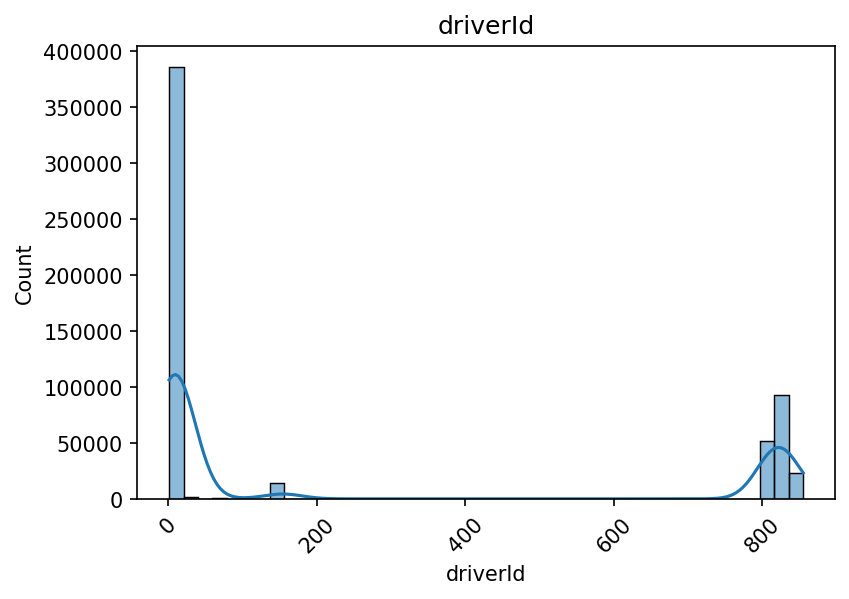

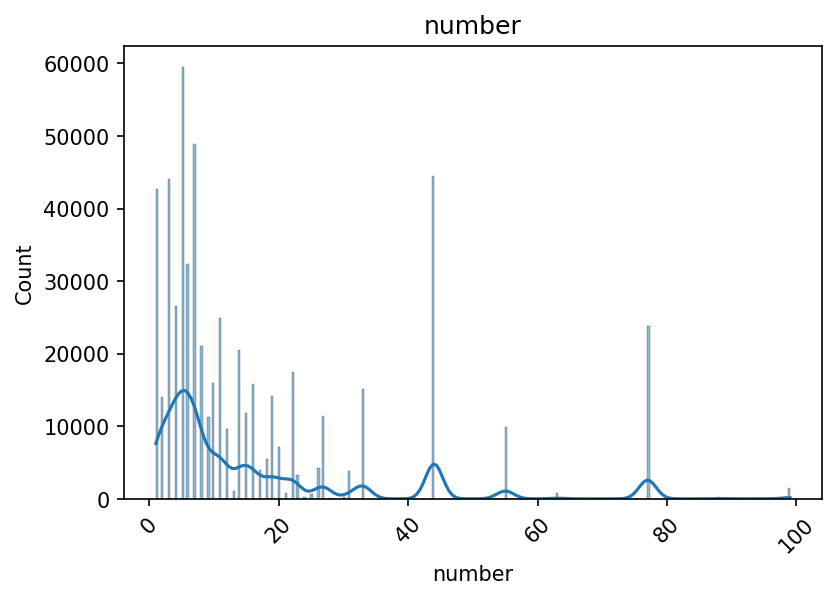

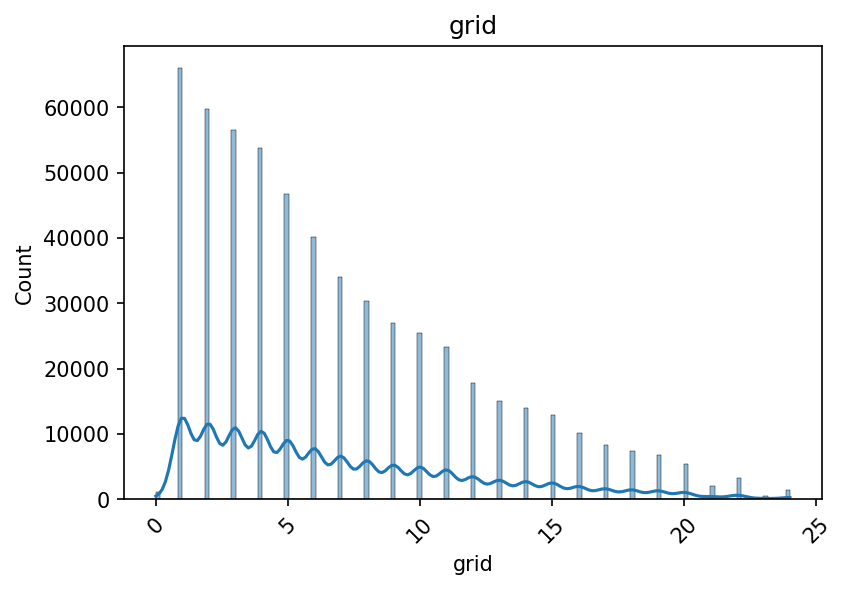

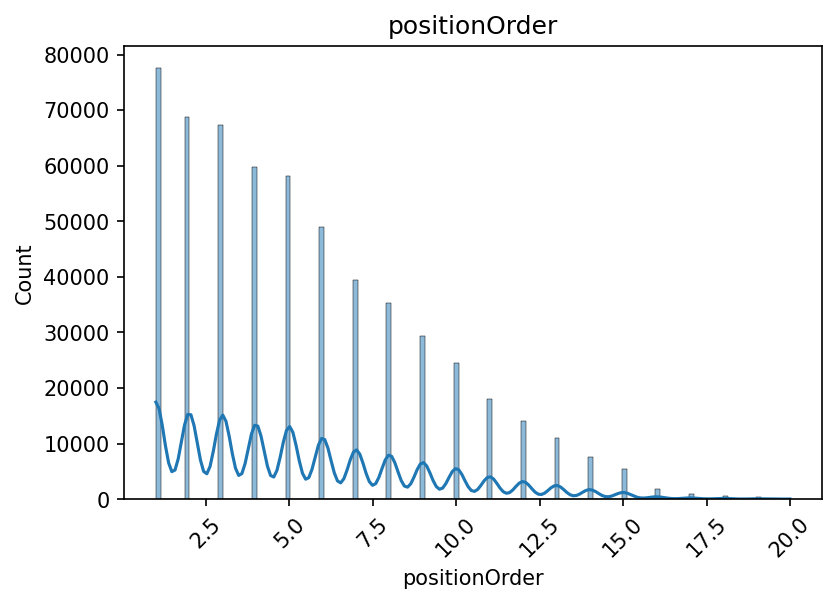

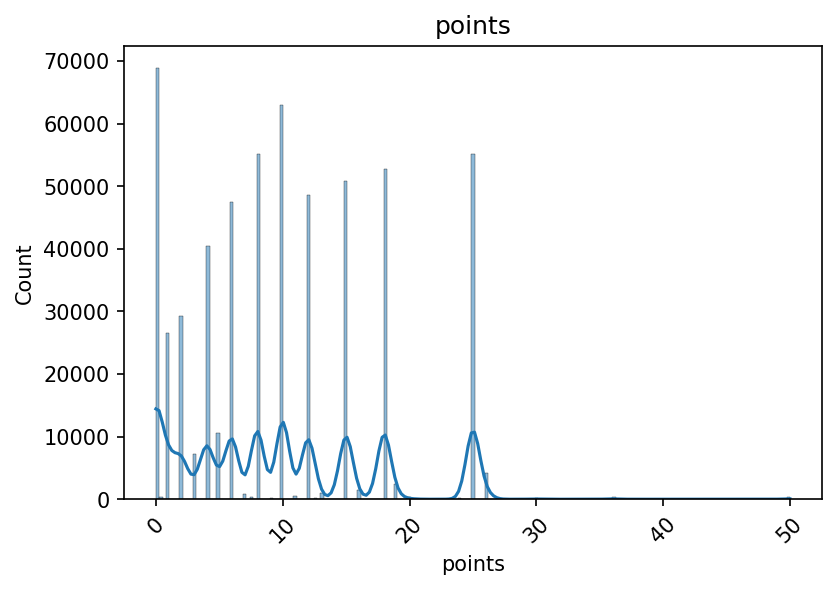

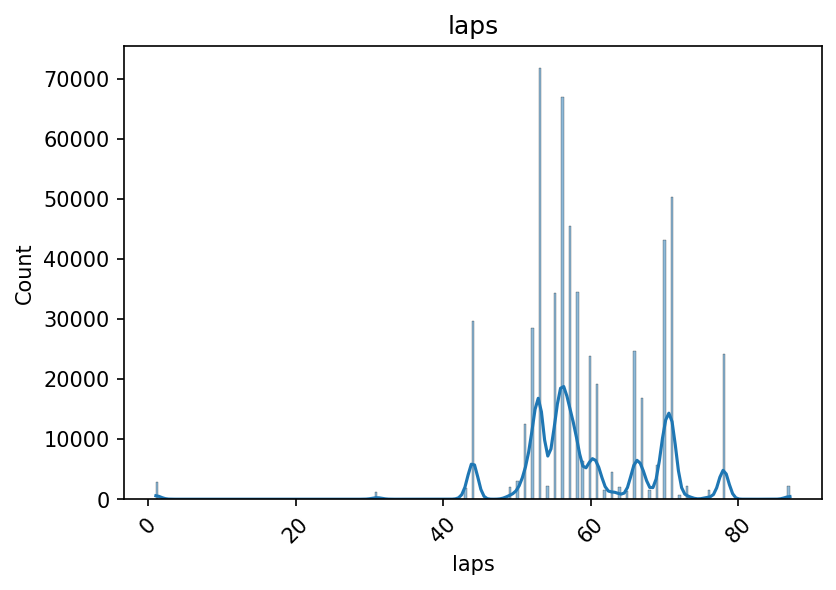

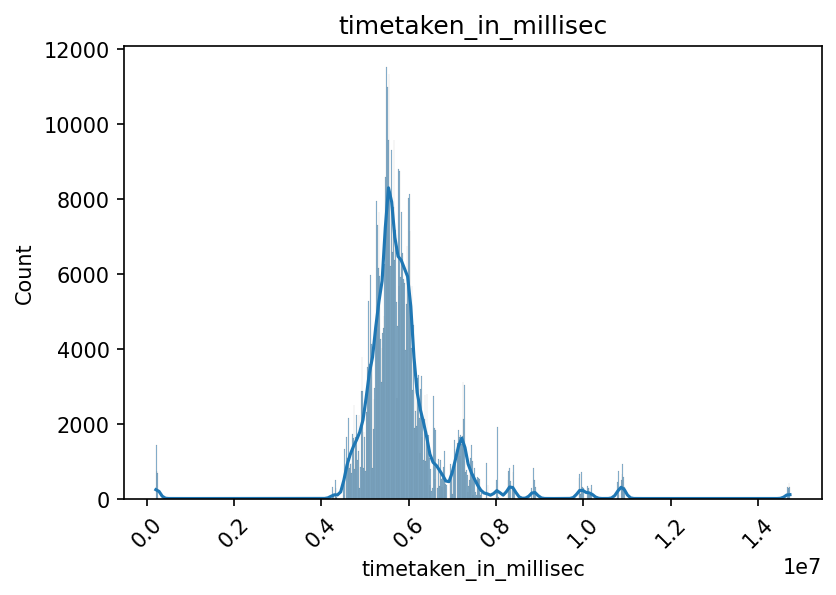

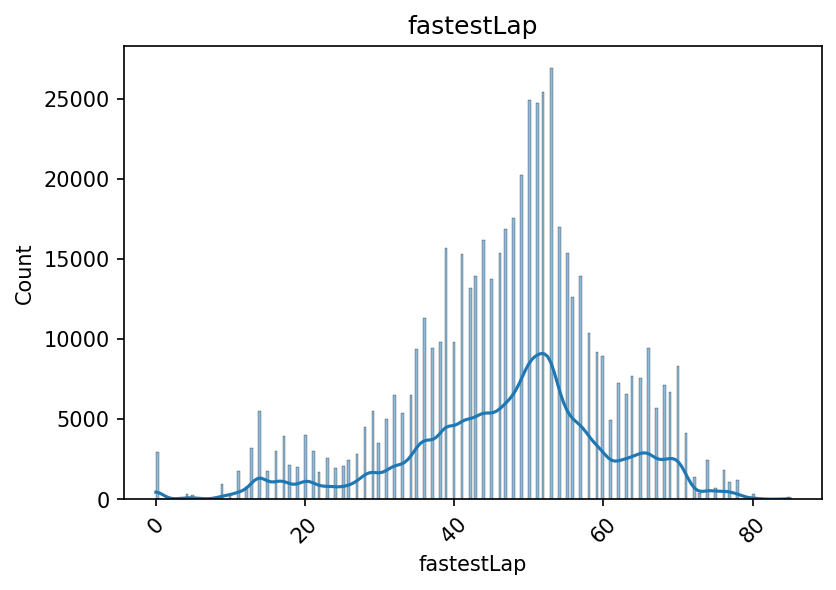

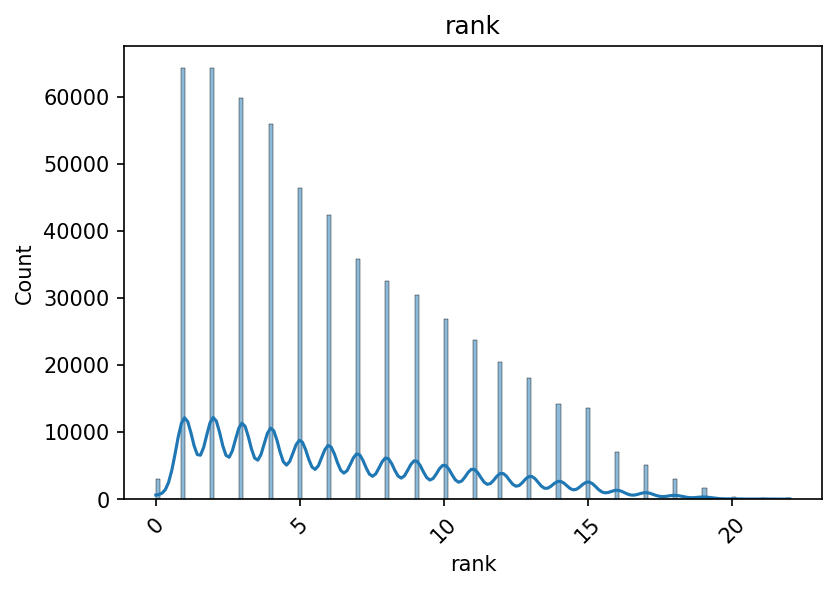

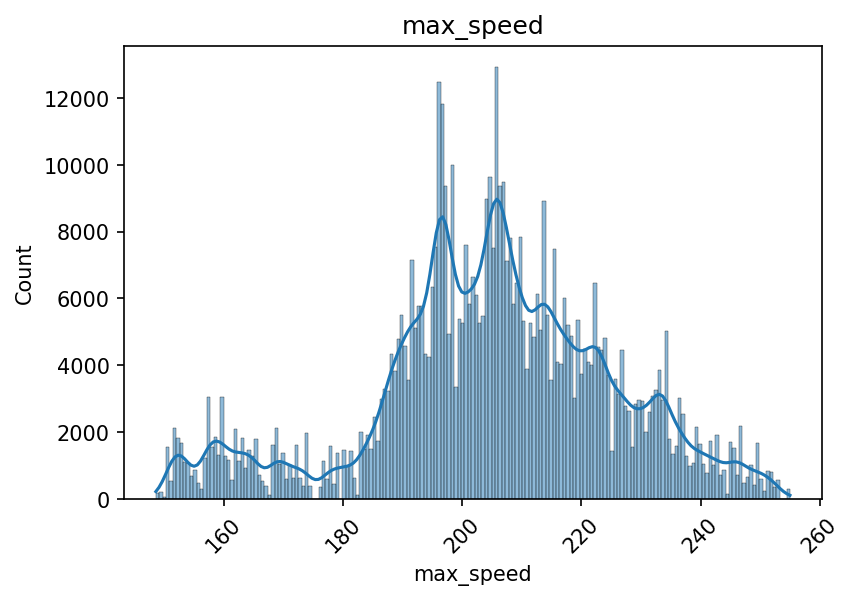

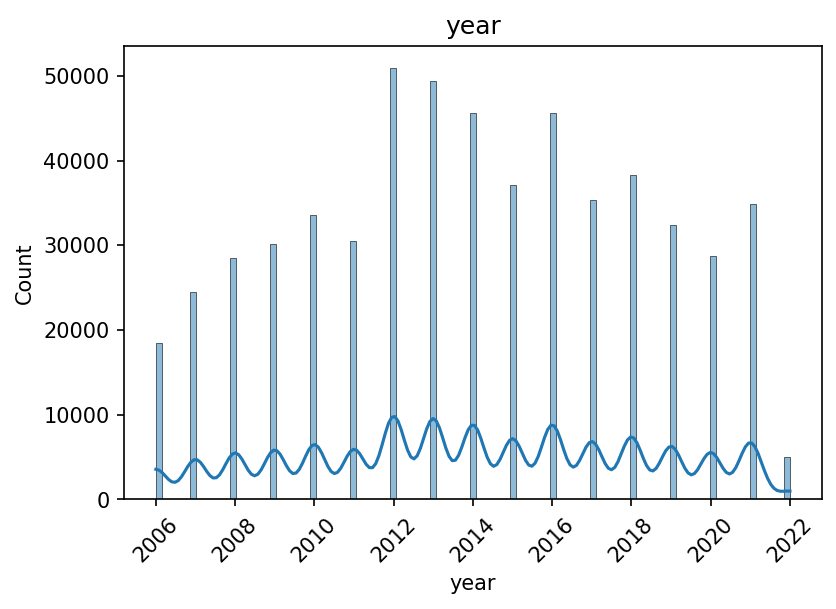

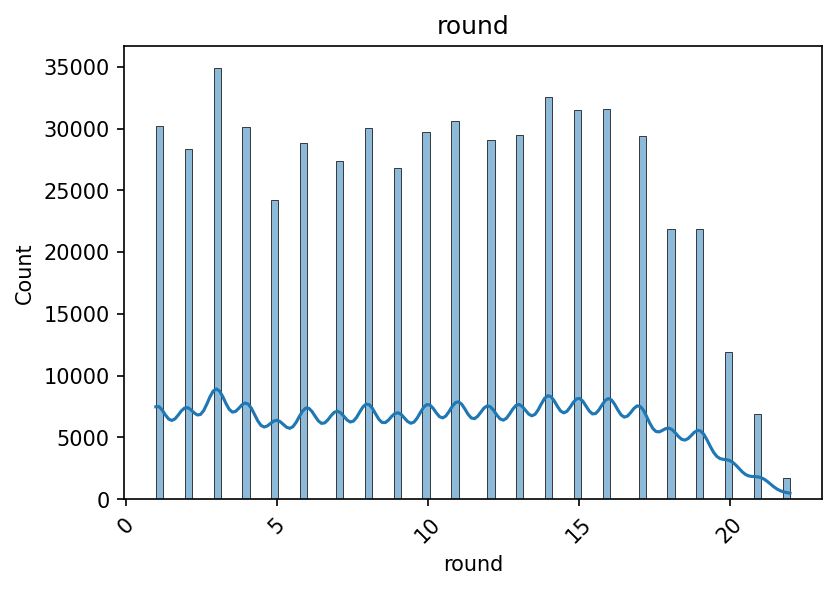

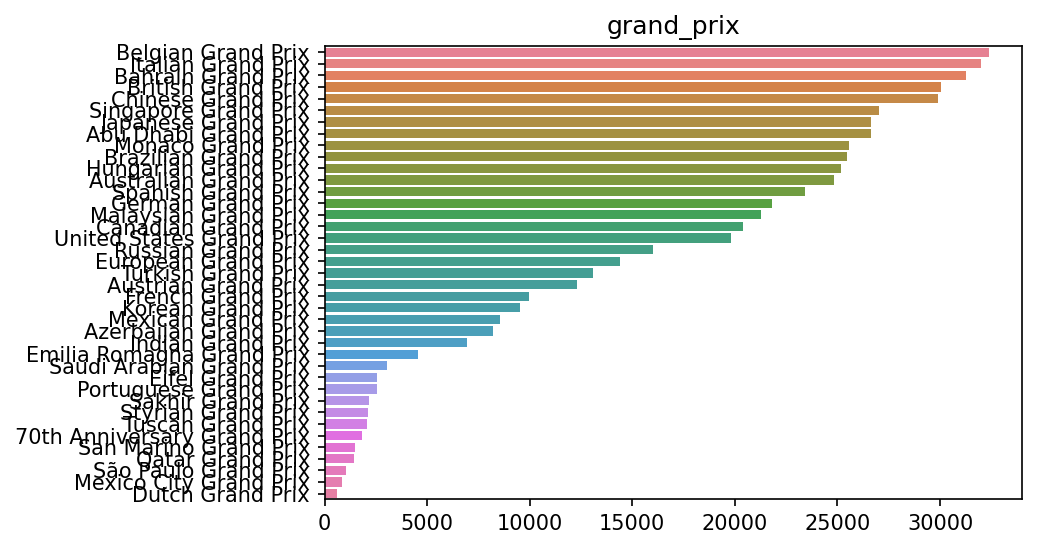

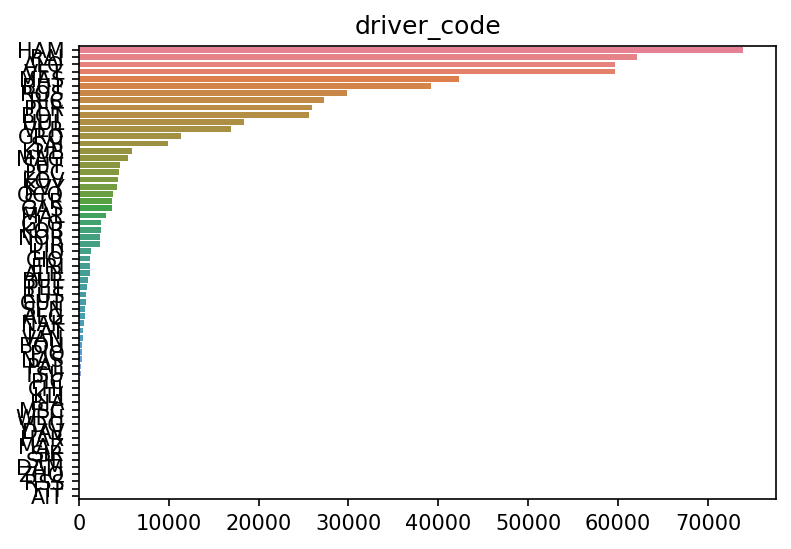

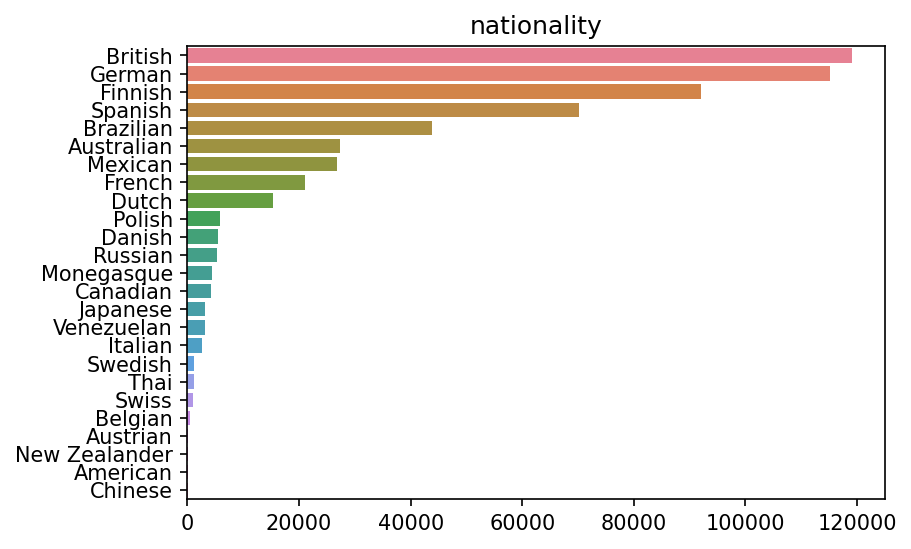

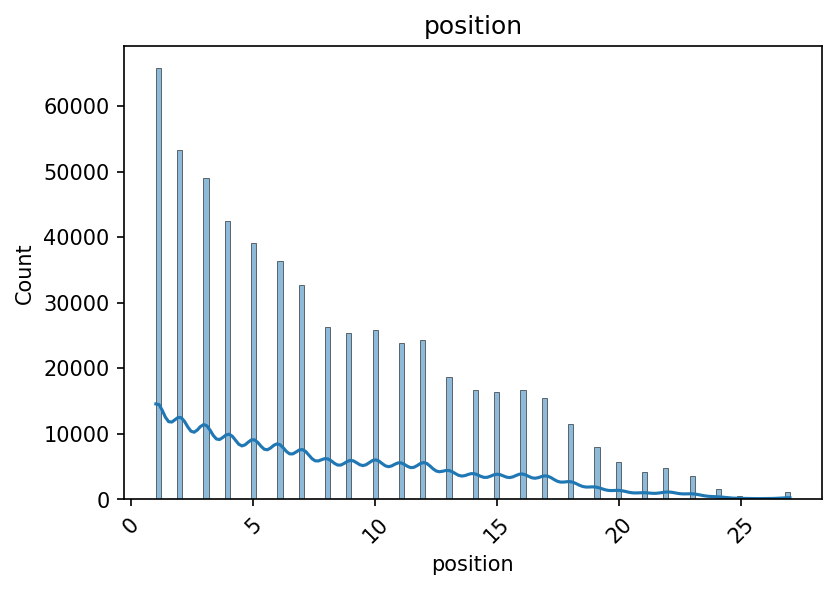

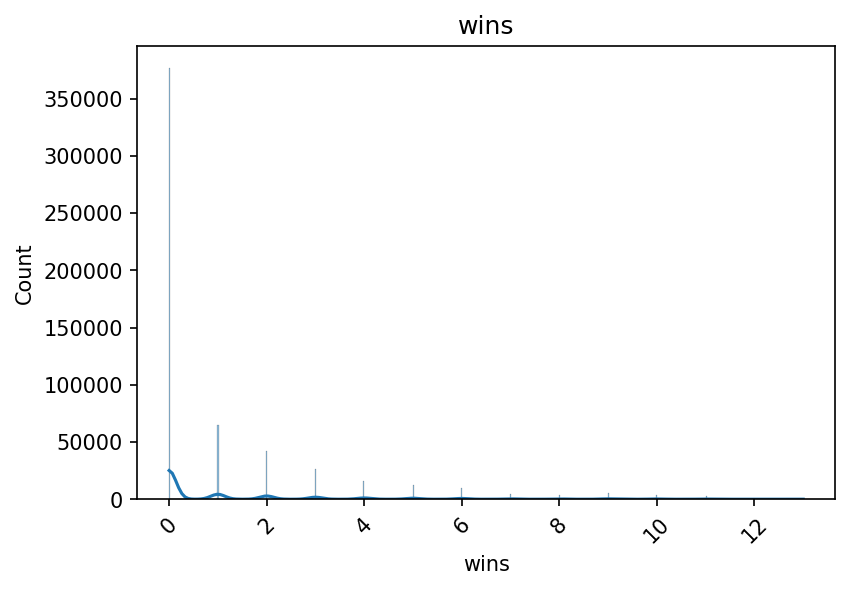

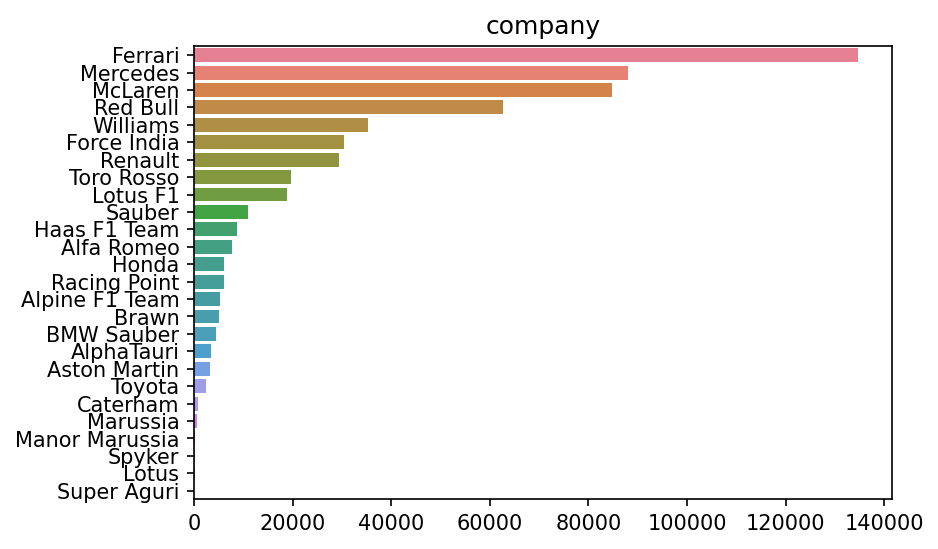

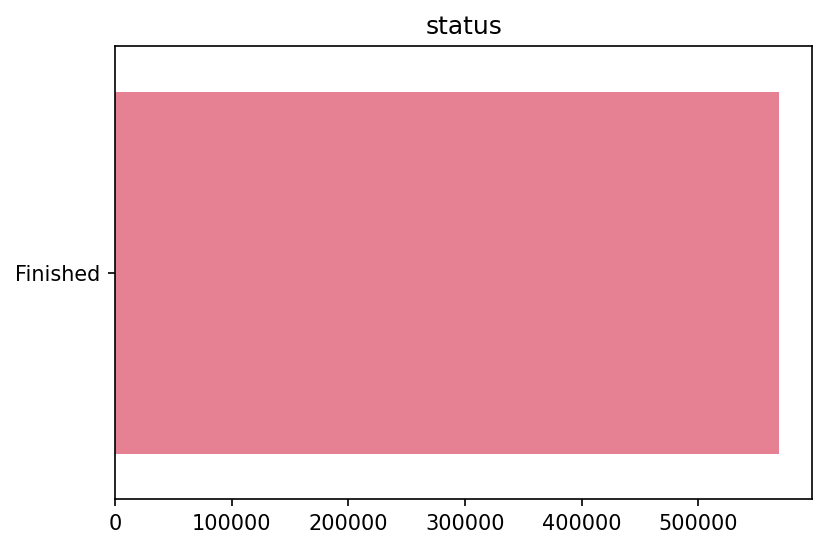

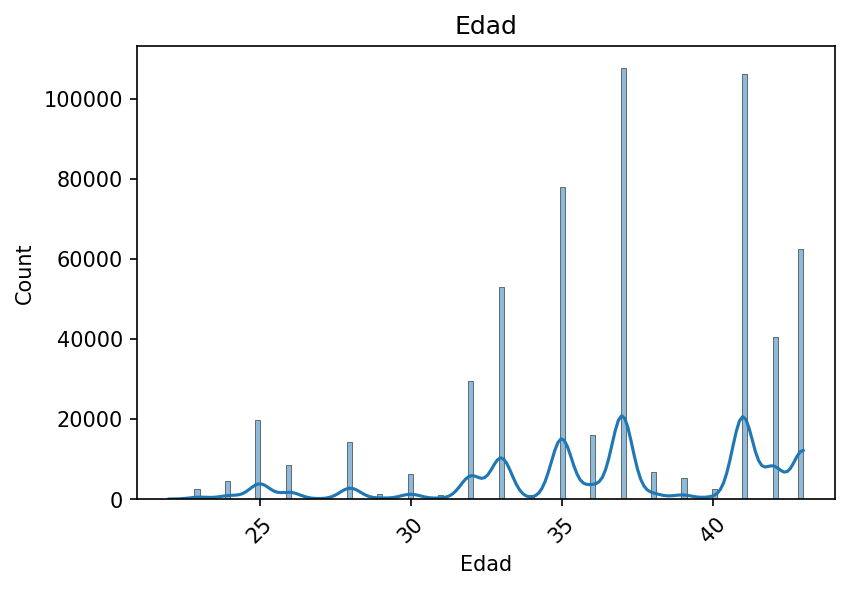

,driverId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,grand_prix,driver_code,nationality,position,wins,company,status,Edad
0,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,Australian Grand Prix,HAM,British,1,1,McLaren,Finished,37
1,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,Australian Grand Prix,HAM,British,1,1,McLaren,Finished,37
2,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,Australian Grand Prix,HAM,British,3,1,McLaren,Finished,37
3,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,Australian Grand Prix,HAM,British,2,1,McLaren,Finished,37
4,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,Australian Grand Prix,HAM,British,3,1,McLaren,Finished,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250113,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,Brazilian Grand Prix,OCO,French,11,1,Manor Marussia,Finished,26
1250114,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,Brazilian Grand Prix,OCO,French,11,1,Manor Marussia,Finished,26
1250115,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,Brazilian Grand Prix,OCO,French,7,0,Manor Marussia,Finished,26
1250116,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,Brazilian Grand Prix,OCO,French,6,0,Manor Marussia,Finished,26


In [61]:
graf_automaticos(df_finished_status)

Se filtrara con la llegada de red bull a la formula 1 que es el año 2005

In [62]:
df_finished_status=df_finished_status.loc[df_finished_status['year']>2005,:]

Se puede observar que existen muy bajas correlaciones entre la data aunque llama la atención los siguientes pares:
- Edad wins con un 0.01
- wins constructorID con un 0.1
- number y wins
- year fastestlap con un 0.36
- year maxspeed con un 0.07
- rank position order con un 0.61
- fastestlap con laps con un 0.35
- position order con driverID con un 0.28
- position order con rank con un 0.63

# algunos gráficos

quitar los grand prix
ocupar apply lambda

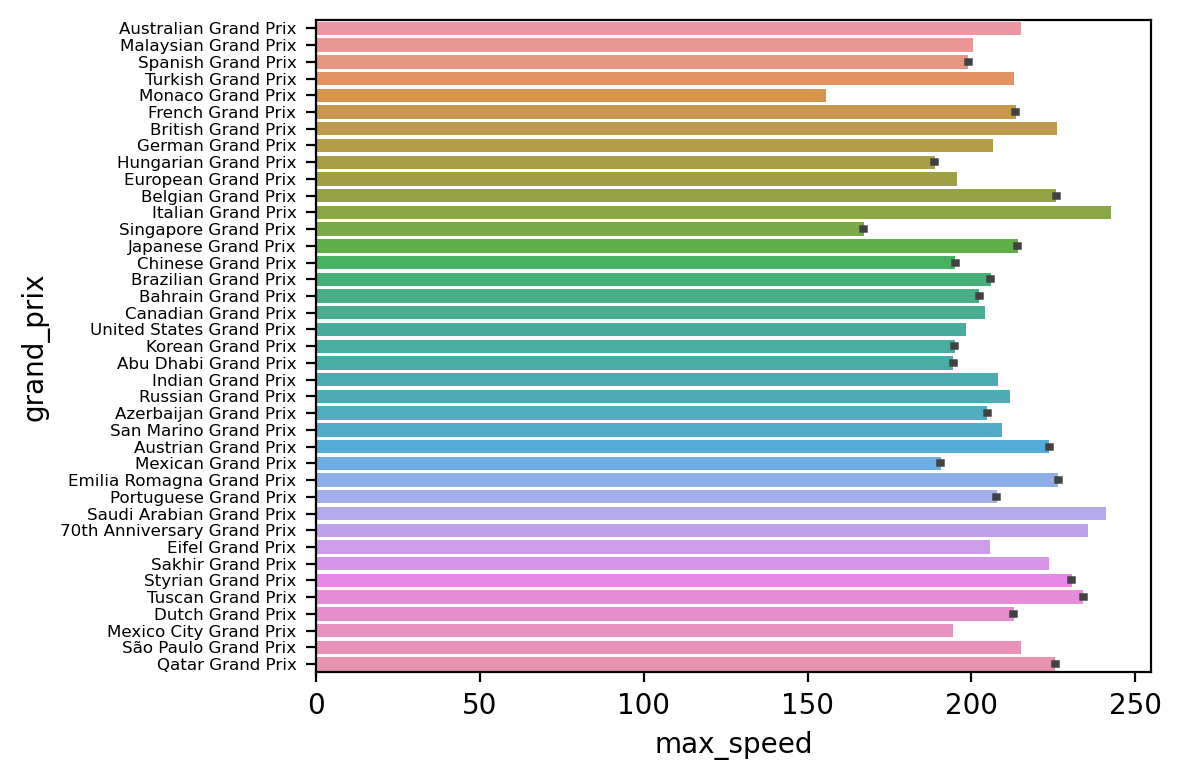

In [63]:
plt.figure(dpi=200)
sns.barplot(data=df_finished_status,y='grand_prix',x='max_speed',dodge=False)
plt.yticks(fontsize=6)
plt.tight_layout()

In [64]:
df_finished_status.drop_duplicates(inplace=True)

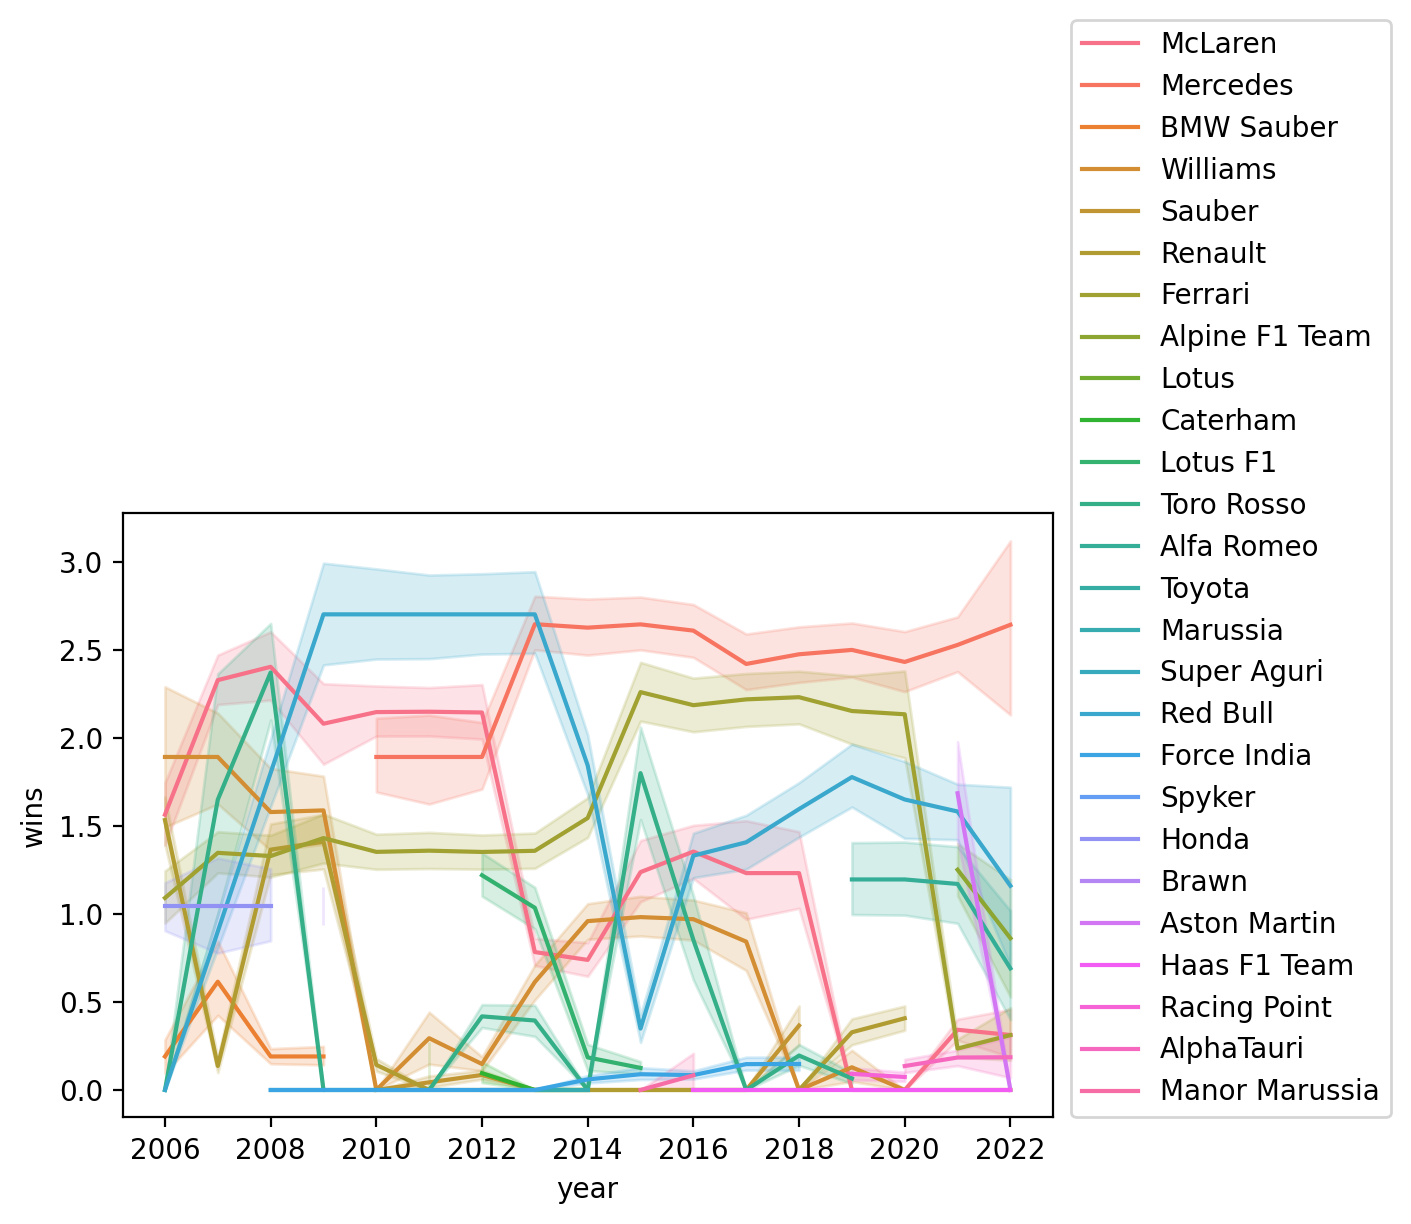

In [67]:
plt.figure(dpi=200)
sns.lineplot(data=df_finished_status,x='year',y='wins',hue='company')
plt.legend(loc=[1.02,0])

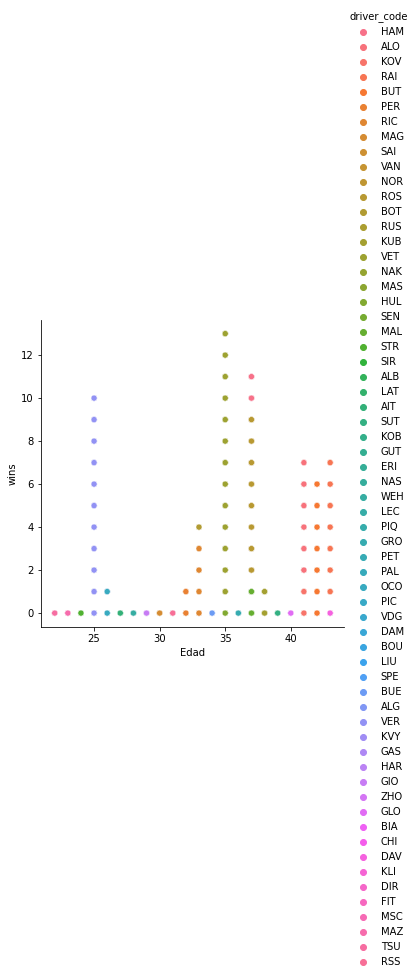

In [68]:
sns.relplot(data=df_finished_status,x='Edad',y='wins',hue='driver_code')

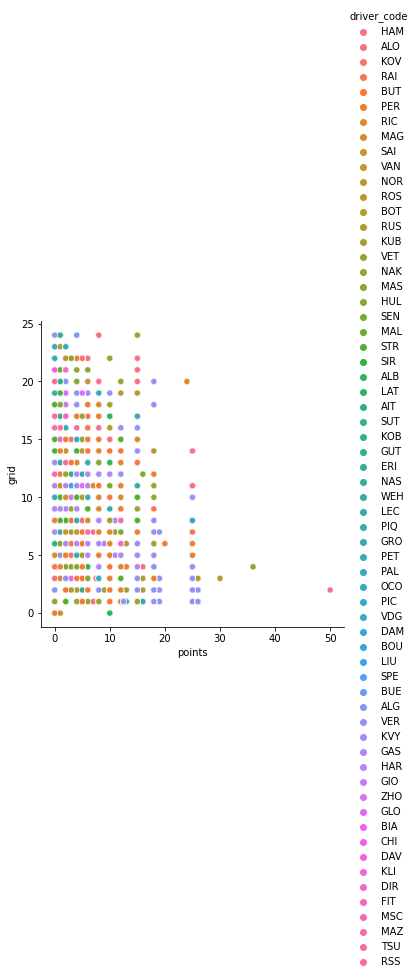

In [69]:
sns.relplot(data=df_finished_status,x='points',y='grid',hue='driver_code')

In [ ]:
df_finished_status.drop('date',1,inplace=True)
df_finished_status.drop('dob',1,inplace=True)

In [71]:
df_finished_status.shape

(81324, 20)

In [72]:
cat = []
num = []
for i in df_finished_status.columns:
    if df_finished_status[i].dtypes == 'O':
        cat.append(i)
    else:
        num.append(i)

In [73]:
df_cat=df_finished_status[cat]
df_cat

,grand_prix,driver_code,nationality,company,status
0,Australian Grand Prix,HAM,British,McLaren,Finished
2,Australian Grand Prix,HAM,British,McLaren,Finished
3,Australian Grand Prix,HAM,British,McLaren,Finished
5,Australian Grand Prix,HAM,British,McLaren,Finished
6,Australian Grand Prix,HAM,British,McLaren,Finished
...,...,...,...,...,...
1250093,Brazilian Grand Prix,OCO,French,Manor Marussia,Finished
1250096,Brazilian Grand Prix,OCO,French,Manor Marussia,Finished
1250104,Brazilian Grand Prix,OCO,French,Manor Marussia,Finished
1250115,Brazilian Grand Prix,OCO,French,Manor Marussia,Finished


In [74]:
df_num=df_finished_status[num]
df_num

,driverId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,position,wins,Edad
0,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,1,1,37
2,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,3,1,37
3,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,2,1,37
5,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,1,2,37
6,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,2,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1250093,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,11,1,26
1250096,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,9,0,26
1250104,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,10,1,26
1250115,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,7,0,26


<AxesSubplot:title={'center':'Correlación'}>

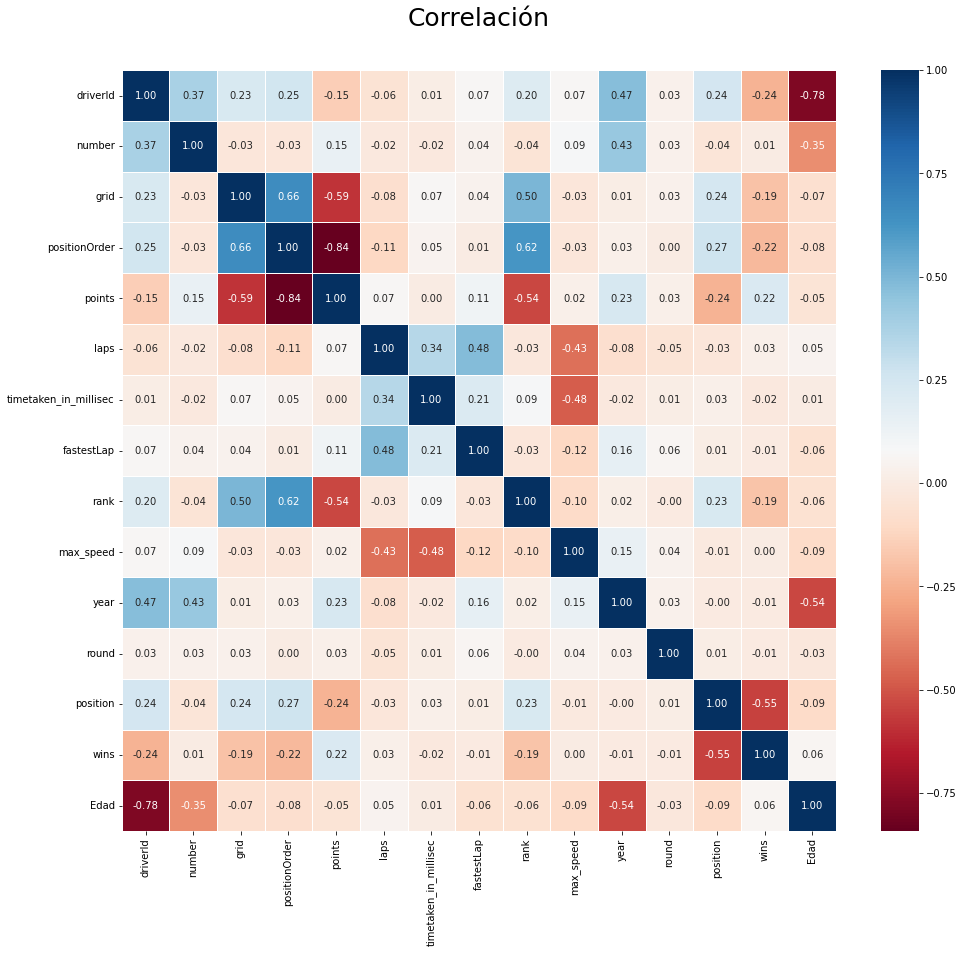

In [75]:
colormap = plt.cm.RdBu
plt.figure(figsize=(16,14))
plt.title('Correlación', y=1.05, size=25,)
sns.heatmap(df_num.corr(),linewidths=0.5,
             cmap=colormap, linecolor='white', annot=True,fmt='.2f')

In [76]:
df_cat['grand_prix']=df_cat['grand_prix'].apply(lambda x: x.replace('Grand Prix',''))

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/1051926659.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_cat['grand_prix']=df_cat['grand_prix'].apply(lambda x: x.replace('Grand Prix',''))


In [77]:
df_cat

,grand_prix,driver_code,nationality,company,status
0,Australian,HAM,British,McLaren,Finished
2,Australian,HAM,British,McLaren,Finished
3,Australian,HAM,British,McLaren,Finished
5,Australian,HAM,British,McLaren,Finished
6,Australian,HAM,British,McLaren,Finished
...,...,...,...,...,...
1250093,Brazilian,OCO,French,Manor Marussia,Finished
1250096,Brazilian,OCO,French,Manor Marussia,Finished
1250104,Brazilian,OCO,French,Manor Marussia,Finished
1250115,Brazilian,OCO,French,Manor Marussia,Finished


In [93]:
df_num.columns[0]

'driverId'

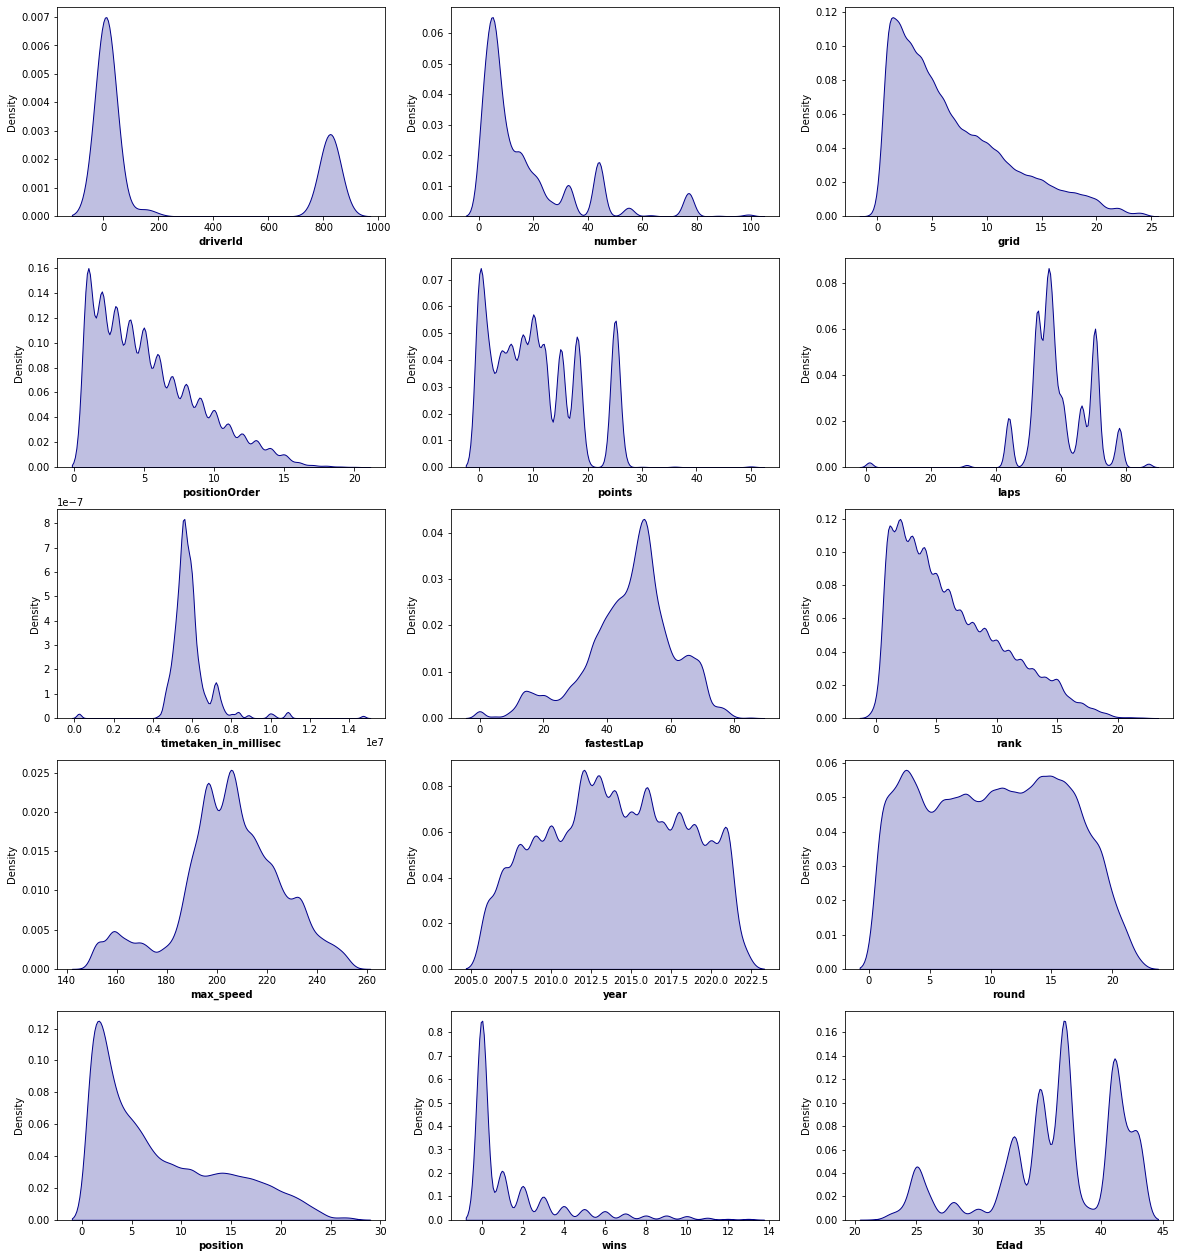

In [102]:
df_num.columns
plt.figure(figsize=(20,50)) 
for i,j in zip(num,range(1,len(num)+1)):

    plt.subplot(11,3,j)
    sns.kdeplot(df_num[i],shade=True,color='darkblue')
    if j==1:
        plt.xlabel(df_num.columns[0],weight='bold')
    else:
        plt.xlabel(df_num.columns[j-1],weight='bold')
plt.show()

## Separando la data para hacer los modelos

Diagrama de cajas para ver outlayer

In [ ]:
#Q1 = df.quantile(0.25)
#Q3 = df.quantile(0.75)
#IQR = Q3 - Q1
#df = df[~((df<(Q1-1.5*IQR)) | (df>(Q3+1.5*IQR))).any(axis=1)]
#df.skew()

In [103]:
def generando_etiquetas(data):
    from sklearn.preprocessing import LabelEncoder
    columna=list(data.describe(include=object).columns)
    for i in range(len(columna)):
        print (columna[i],data[columna[i]].unique() )
    for i in range (len(columna)):
        etiq = LabelEncoder()
        Label = etiq.fit_transform(data[columna[i]])
        label_embarked = {index: label for index, label in 
                        enumerate(etiq.classes_)}
        label_embarked
        data[columna[i]]=Label
    return data.info()


In [104]:
generando_etiquetas(df_cat)

grand_prix ['Australian ' 'Malaysian ' 'Spanish ' 'Turkish ' 'Monaco ' 'French '
 'British ' 'German ' 'Hungarian ' 'European ' 'Belgian ' 'Italian '
 'Singapore ' 'Japanese ' 'Chinese ' 'Brazilian ' 'Bahrain ' 'Canadian '
 'United States ' 'Korean ' 'Abu Dhabi ' 'Indian ' 'Russian '
 'Azerbaijan ' 'San Marino ' 'Austrian ' 'Mexican ' 'Emilia Romagna '
 'Portuguese ' 'Saudi Arabian ' '70th Anniversary ' 'Eifel ' 'Sakhir '
 'Styrian ' 'Tuscan ' 'Dutch ' 'Mexico City ' 'São Paulo ' 'Qatar ']
driver_code ['HAM' 'ALO' 'KOV' 'RAI' 'BUT' 'PER' 'RIC' 'MAG' 'SAI' 'VAN' 'NOR' 'ROS'
 'BOT' 'RUS' 'KUB' 'VET' 'NAK' 'MAS' 'HUL' 'SEN' 'MAL' 'STR' 'SIR' 'ALB'
 'LAT' 'AIT' 'SUT' 'KOB' 'GUT' 'ERI' 'NAS' 'WEH' 'LEC' 'PIQ' 'GRO' 'PET'
 'PAL' 'OCO' 'PIC' 'VDG' 'DAM' 'BOU' 'LIU' 'SPE' 'BUE' 'ALG' 'VER' 'KVY'
 'GAS' 'HAR' 'GIO' 'ZHO' 'GLO' 'BIA' 'CHI' 'DAV' 'KLI' 'DIR' 'FIT' 'MSC'
 'MAZ' 'TSU' 'RSS']
nationality ['British' 'Spanish' 'Finnish' 'Mexican' 'Australian' 'Danish' 'Belgian'
 'German' 'Polish' 'Jap

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/2848758527.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[columna[i]]=Label


In [105]:
df_cat.reset_index()

,index,grand_prix,driver_code,nationality,company,status
0,0,2,20,5,15,0
1,2,2,20,5,15,0
2,3,2,20,5,15,0
3,5,2,20,5,15,0
4,6,2,20,5,15,0
...,...,...,...,...,...,...
81319,1250093,7,39,11,13,0
81320,1250096,7,39,11,13,0
81321,1250104,7,39,11,13,0
81322,1250115,7,39,11,13,0


In [106]:
values=df_num.drop(columns=['driverId'])
scaler = StandardScaler()
scaler.fit(values)
values1 = scaler.transform(values)

In [107]:
values1

array([[ 0.28574702, -1.11250116, -1.18149199, ..., -1.07339501,
        -0.20812369,  0.13446255],
       [ 0.28574702, -1.11250116, -1.18149199, ..., -0.75999197,
        -0.20812369,  0.13446255],
       [ 0.28574702, -1.11250116, -1.18149199, ..., -0.91669349,
        -0.20812369,  0.13446255],
       ...,
       [ 0.7699221 ,  2.93864297,  1.84132009, ...,  0.33691867,
        -0.20812369, -2.02486532],
       [ 0.7699221 ,  2.93864297,  1.84132009, ..., -0.13318589,
        -0.61205312, -2.02486532],
       [ 0.7699221 ,  2.93864297,  1.84132009, ..., -0.28988741,
        -0.61205312, -2.02486532]])

In [108]:
data=pd.DataFrame(values1)

In [109]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-1.073395,-0.208124,0.134463
1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.759992,-0.208124,0.134463
2,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.916693,-0.208124,0.134463
3,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-1.073395,0.195806,0.134463
4,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.916693,0.195806,0.134463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81319,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.493620,-0.208124,-2.024865
81320,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.180217,-0.612053,-2.024865
81321,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.336919,-0.208124,-2.024865
81322,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,-0.133186,-0.612053,-2.024865


In [110]:
df_num.columns[1:16]

Index(['number', 'grid', 'positionOrder', 'points', 'laps',
       'timetaken_in_millisec', 'fastestLap', 'rank', 'max_speed', 'year',
       'round', 'position', 'wins', 'Edad'],
      dtype='object')

In [111]:
df_num.reset_index()

,index,driverId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,position,wins,Edad
0,0,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,1,1,37
1,2,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,3,1,37
2,3,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,2,1,37
3,5,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,1,2,37
4,6,1,22,1,1,10.0,58,5690616.0,39.0,2.0,218.300,2008,1,2,2,37
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81319,1250093,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,11,1,26
81320,1250096,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,9,0,26
81321,1250104,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,10,1,26
81322,1250115,839,31,22,12,0.0,71,10907144.0,47.0,16.0,176.686,2016,20,7,0,26


In [112]:
data.columns=df_num.columns[1:16]

In [113]:
data

,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,position,wins,Edad
0,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-1.073395,-0.208124,0.134463
1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.759992,-0.208124,0.134463
2,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.916693,-0.208124,0.134463
3,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-1.073395,0.195806,0.134463
4,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.916693,0.195806,0.134463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81319,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.493620,-0.208124,-2.024865
81320,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.180217,-0.612053,-2.024865
81321,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.336919,-0.208124,-2.024865
81322,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,-0.133186,-0.612053,-2.024865


In [114]:
data_new=pd.merge(df_num['driverId'].reset_index(),data,left_index=True,right_index=True)
data_new.drop('index',1,inplace=True)
data_new

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/2043325027.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  data_new.drop('index',1,inplace=True)


,driverId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,position,wins,Edad
0,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-1.073395,-0.208124,0.134463
1,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.759992,-0.208124,0.134463
2,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.916693,-0.208124,0.134463
3,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-1.073395,0.195806,0.134463
4,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.916693,0.195806,0.134463
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81319,839,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.493620,-0.208124,-2.024865
81320,839,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.180217,-0.612053,-2.024865
81321,839,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.336919,-0.208124,-2.024865
81322,839,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,-0.133186,-0.612053,-2.024865


In [115]:
finale=pd.merge(data_new,df_cat.reset_index(),left_index=True,right_index=True)
finale.drop('index',1,inplace=True)
finale

/var/folders/6y/9fksy1pj1bnbf51v6nyzx6fc0000gn/T/ipykernel_1112/19197642.py:2: FutureWarning: In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
  finale.drop('index',1,inplace=True)


,driverId,number,grid,positionOrder,points,laps,timetaken_in_millisec,fastestLap,rank,max_speed,year,round,position,wins,Edad,grand_prix,driver_code,nationality,company,status
0,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-1.073395,-0.208124,0.134463,2,20,5,15,0
1,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.759992,-0.208124,0.134463,2,20,5,15,0
2,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.916693,-0.208124,0.134463,2,20,5,15,0
3,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-1.073395,0.195806,0.134463,2,20,5,15,0
4,1,0.285747,-1.112501,-1.181492,-0.021082,-0.144767,-0.161800,-0.593554,-0.962942,0.639700,-1.406225,-1.625998,-0.916693,0.195806,0.134463,2,20,5,15,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
81319,839,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.493620,-0.208124,-2.024865,7,39,11,13,0
81320,839,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.180217,-0.612053,-2.024865,7,39,11,13,0
81321,839,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,0.336919,-0.208124,-2.024865,7,39,11,13,0
81322,839,0.769922,2.938643,1.841320,-1.292468,1.217052,4.639631,-0.017611,2.270596,-1.371756,0.462354,1.728328,-0.133186,-0.612053,-2.024865,7,39,11,13,0


In [155]:
finale.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 81324 entries, 0 to 81323
Data columns (total 21 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   driverId               81324 non-null  int64  
 1   number                 81324 non-null  float64
 2   grid                   81324 non-null  float64
 3   positionOrder          81324 non-null  float64
 4   points                 81324 non-null  float64
 5   laps                   81324 non-null  float64
 6   timetaken_in_millisec  81324 non-null  float64
 7   fastestLap             81324 non-null  float64
 8   rank                   81324 non-null  float64
 9   max_speed              81324 non-null  float64
 10  year                   81324 non-null  float64
 11  round                  81324 non-null  float64
 12  position               81324 non-null  float64
 13  wins                   81324 non-null  float64
 14  Edad                   81324 non-null  float64
 15  Vi

In [116]:
finale1=finale.sample(frac=0.5)

In [117]:
X = finale1.drop(columns=['driverId','driver_code','number','status'])
y = finale1["driverId"]

In [118]:
y.nunique()

62

In [119]:
len(X)

40662

In [120]:
X_train, X_val, y_train, y_val = train_test_split(X, y,test_size=0.3)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val,test_size=0.5)

No escalar las variables categoricas aunque esten etiquetadas
no poner en matriz de correlacion las nuevas etiquetas

In [121]:
from sklearn.metrics import make_scorer,recall_score

# Los modelos

## knn

In [122]:
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)
print(recall_score(y_val,predictions,average='macro'))

Accuracy: 0.985899327758649
0.8058740808527158


In [123]:
k_range = list(range(1, 20))
param_grid = dict(n_neighbors=k_range)
  
# defining parameter range
grid = GridSearchCV(knn, param_grid, cv=2, scoring='recall_macro',refit='recall_macro',return_train_score=True,verbose=1)
grid.fit(X_train, y_train)

Fitting 2 folds for each of 19 candidates, totalling 38 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


GridSearchCV(cv=2, estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                         13, 14, 15, 16, 17, 18, 19]},
             refit='recall_macro', return_train_score=True,
             scoring='recall_macro', verbose=1)

In [177]:
cvres = grid.cv_results_
print(cvres['mean_test_score'], cvres['params'])

[0.89091979 0.75349702 0.71438155 0.62486664 0.600022   0.5506551
 0.52340184 0.49887551 0.48419921 0.46696854 0.45831775 0.44205638
 0.43416996 0.4237209  0.41955045 0.40941346 0.40209673 0.39032818
 0.38467438] [{'n_neighbors': 1}, {'n_neighbors': 2}, {'n_neighbors': 3}, {'n_neighbors': 4}, {'n_neighbors': 5}, {'n_neighbors': 6}, {'n_neighbors': 7}, {'n_neighbors': 8}, {'n_neighbors': 9}, {'n_neighbors': 10}, {'n_neighbors': 11}, {'n_neighbors': 12}, {'n_neighbors': 13}, {'n_neighbors': 14}, {'n_neighbors': 15}, {'n_neighbors': 16}, {'n_neighbors': 17}, {'n_neighbors': 18}, {'n_neighbors': 19}]


In [178]:
print('Mejores hiperparametros: %s' % grid.best_params_)

Mejores hiperparametros: {'n_neighbors': 1}


In [179]:
knn = KNeighborsClassifier(n_neighbors=1)
knn.fit(X_train, y_train) 
predictions = knn.predict(X_val)
accuracy=knn.score(X_val, y_val)
print('Accuracy:',accuracy)
print('Recall',recall_score(y_val,knn.predict(X_val),average='macro'))

Accuracy: 0.9981964256435482
Recall 0.9630229091722254


In [180]:
predictions = knn.predict(X_test)
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       881
           3       1.00      1.00      1.00       401
           4       1.00      1.00      1.00       540
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00       517
           9       1.00      1.00      1.00        87
          10       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00       397
          16       1.00      1.00      1.00        46
          18       1.00      1.00      1.00       340
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00       763
          24       1.00      1.00      1.00        14
          32       1.00      1.00      1.00         2
          67       0.94    

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

## Decision tree

In [181]:
tree_clf = DecisionTreeClassifier(max_depth=4)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))
print('Recall',recall_score(y_val,tree_clf.predict(X_val),average='macro'))


Accuracy 0.7191342843089031
Recall 0.23214285714285715


In [182]:
tree_range = list(range(1, 30))
param_grid = dict(max_depth=tree_range)

arbol_clf = DecisionTreeClassifier()

grid_search = GridSearchCV(arbol_clf, param_grid, cv=5,
                           scoring='recall_macro',
                           refit='recall_macro',
                           return_train_score=True)

grid_search.fit(X_train, y_train)


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn

GridSearchCV(cv=5, estimator=DecisionTreeClassifier(),
             param_grid={'max_depth': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12,
                                       13, 14, 15, 16, 17, 18, 19, 20, 21, 22,
                                       23, 24, 25, 26, 27, 28, 29]},
             refit='recall_macro', return_train_score=True,
             scoring='recall_macro')

In [183]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])


[0.03472474 0.06944949 0.12849365 0.21185723 0.31603146 0.42020569
 0.55214761 0.63313753 0.71955719 0.82791498 0.90764366 0.92695848
 0.95792972 0.96813936 0.97983228 0.96663122 0.97582702 0.97922034
 0.97241359 0.98258308 0.97931014 0.98258308 0.98258308 0.98603136
 0.97586187 0.9742254  0.97586187 0.97586187 0.97241359] [{'max_depth': 1}, {'max_depth': 2}, {'max_depth': 3}, {'max_depth': 4}, {'max_depth': 5}, {'max_depth': 6}, {'max_depth': 7}, {'max_depth': 8}, {'max_depth': 9}, {'max_depth': 10}, {'max_depth': 11}, {'max_depth': 12}, {'max_depth': 13}, {'max_depth': 14}, {'max_depth': 15}, {'max_depth': 16}, {'max_depth': 17}, {'max_depth': 18}, {'max_depth': 19}, {'max_depth': 20}, {'max_depth': 21}, {'max_depth': 22}, {'max_depth': 23}, {'max_depth': 24}, {'max_depth': 25}, {'max_depth': 26}, {'max_depth': 27}, {'max_depth': 28}, {'max_depth': 29}]


In [184]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'max_depth': 24}


In [185]:
tree_clf = DecisionTreeClassifier(max_depth=24)
tree_clf.fit(X_train, y_train)
print('Accuracy', tree_clf.score(X_val, y_val))
print('Recall',recall_score(y_val,tree_clf.predict(X_val),average='weighted'))


Accuracy 0.9996720773897361
Recall 0.9996720773897361


In [186]:
validacion_tree=tree_clf.predict(X_test)
print(classification_report(y_test, validacion_tree))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       881
           3       1.00      1.00      1.00       401
           4       1.00      1.00      1.00       540
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00       517
           9       1.00      1.00      1.00        87
          10       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00       397
          16       1.00      1.00      1.00        46
          18       1.00      1.00      1.00       340
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00       763
          24       1.00      1.00      1.00        14
          32       1.00      1.00      1.00         2
          67       1.00    

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall and F-score are ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_

## random forest

In [188]:
rndf_clf = RandomForestClassifier(n_estimators=150)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)

print(rndf_clf.score(X_val, y_val))
print(recall_score(y_val,y_pred,average='macro'))


0.9996720773897361
0.9642857142857143


In [ ]:
RandomForestClassifier()

In [192]:
param_grid = [{'n_estimators':[150,200,250,300],
                'max_depth':[22,23,24,25]}
]

forest_clf = RandomForestClassifier()

from sklearn.model_selection import GridSearchCV

grid_search = GridSearchCV(forest_clf, param_grid, cv=5,
                            scoring='recall_macro',
                           refit='recall_macro',
                          return_train_score=True)

grid_search.fit(X_train, y_train)


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=5.
  warnings.warn(


GridSearchCV(cv=5, estimator=RandomForestClassifier(),
             param_grid=[{'max_depth': [22, 23, 24, 25],
                          'n_estimators': [150, 200, 250, 300]}],
             refit='recall_macro', return_train_score=True,
             scoring='recall_macro')

In [193]:
cvres = grid_search.cv_results_
print(cvres['mean_test_score'], cvres['params'])


[0.9861464  0.9848533  0.9861464  0.9861464  0.9861464  0.9861464
 0.98263763 0.9857078  0.9857078  0.9861464  0.9861464  0.9861464
 0.9857078  0.9844147  0.9857078  0.9861464 ] [{'max_depth': 22, 'n_estimators': 150}, {'max_depth': 22, 'n_estimators': 200}, {'max_depth': 22, 'n_estimators': 250}, {'max_depth': 22, 'n_estimators': 300}, {'max_depth': 23, 'n_estimators': 150}, {'max_depth': 23, 'n_estimators': 200}, {'max_depth': 23, 'n_estimators': 250}, {'max_depth': 23, 'n_estimators': 300}, {'max_depth': 24, 'n_estimators': 150}, {'max_depth': 24, 'n_estimators': 200}, {'max_depth': 24, 'n_estimators': 250}, {'max_depth': 24, 'n_estimators': 300}, {'max_depth': 25, 'n_estimators': 150}, {'max_depth': 25, 'n_estimators': 200}, {'max_depth': 25, 'n_estimators': 250}, {'max_depth': 25, 'n_estimators': 300}]


In [194]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'max_depth': 22, 'n_estimators': 150}


In [195]:
rndf_clf = RandomForestClassifier(n_estimators=150,max_depth=22)
rndf_clf.fit(X_train, y_train)
y_pred = rndf_clf.predict(X_val)
print(rndf_clf.score(X_val, y_val))
print(recall_score(y_val,y_pred,average='macro'))


0.9996720773897361
0.9642857142857143


In [196]:
validacion=rndf_clf.predict(X_test)
print(classification_report(y_test, validacion))


              precision    recall  f1-score   support

           1       1.00      1.00      1.00       881
           3       1.00      1.00      1.00       401
           4       1.00      1.00      1.00       540
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00       517
           9       1.00      1.00      1.00        87
          10       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00       397
          16       1.00      1.00      1.00        46
          18       1.00      1.00      1.00       340
          19       1.00      1.00      1.00         1
          20       1.00      1.00      1.00       763
          24       1.00      1.00      1.00        14
          32       1.00      1.00      1.00         2
          67       1.00    

## logistic regression

In [198]:
log_reg = LogisticRegression(multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_val)
print(log_reg.score(X_val,y_val))
print(recall_score(y_val,y_pred,average='macro'))

0.7625840301688801
0.36131254917822425


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_logistic.py:814: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [200]:
param_grid = [
    {'C':[1000,50,1,0.5,0.1],
    'penalty':['elasticnet'],
    'solver':['saga'],
    'l1_ratio':[0,0.1,0.2,0.3,0.4,0.5],
    'max_iter':[300],
    'multi_class':['multinomial']}
]

log_reg_clf = LogisticRegression()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(log_reg_clf, param_grid,cv=2,
                          return_train_score=True,scoring='recall_macro',
                           refit='recall_macro',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 30 candidates, totalling 60 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_mode

GridSearchCV(cv=2, estimator=LogisticRegression(),
             param_grid=[{'C': [1000, 50, 1, 0.5, 0.1],
                          'l1_ratio': [0, 0.1, 0.2, 0.3, 0.4, 0.5],
                          'max_iter': [300], 'multi_class': ['multinomial'],
                          'penalty': ['elasticnet'], 'solver': ['saga']}],
             refit='recall_macro', return_train_score=True,
             scoring='recall_macro', verbose=1)

In [201]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'C': 1000, 'l1_ratio': 0.4, 'max_iter': 300, 'multi_class': 'multinomial', 'penalty': 'elasticnet', 'solver': 'saga'}


In [202]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.5436200264956303


In [203]:
log_reg = LogisticRegression(C=1000,penalty='elasticnet',solver='saga',l1_ratio=0.4,max_iter=300,multi_class='multinomial')
log_reg.fit(X_train, y_train)
y_pred=log_reg.predict(X_val)
print(log_reg.score(X_val,y_val))
print(recall_score(y_val,y_pred,average='macro'))

0.9316281357599606
0.6875969682047096


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/linear_model/_sag.py:352: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


In [204]:
predictions_regressor = log_reg.predict(X_test)
print(classification_report(y_test, predictions_regressor))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       881
           3       0.91      0.97      0.94       401
           4       1.00      1.00      1.00       540
           5       0.90      0.81      0.86        70
           6       0.44      0.40      0.42        10
           7       1.00      0.27      0.43        11
           8       0.99      1.00      0.99       517
           9       0.91      0.91      0.91        87
          10       0.57      0.55      0.56        29
          12       1.00      1.00      1.00        10
          13       0.99      1.00      0.99       397
          16       0.80      0.87      0.83        46
          18       0.99      1.00      0.99       340
          19       0.00      0.00      0.00         1
          20       0.92      0.95      0.94       763
          24       0.50      0.29      0.36        14
          32       0.00      0.00      0.00         2
          67       0.89    

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

## ridge

In [205]:
rid_clf = RidgeClassifier(alpha=10) #probar cambiar alpha
rid_clf.fit(X_train, y_train)
rid_clf.score(X_val, y_val)

0.49122807017543857

In [206]:
alpha_range = list(range(5, 150))
param_grid = dict(alpha=alpha_range)

rid_clf = RidgeClassifier()



grid_search = GridSearchCV(rid_clf, param_grid,cv=2,
                          return_train_score=True,verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 145 candidates, totalling 290 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=RidgeClassifier(),
             param_grid={'alpha': [5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16,
                                   17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27,
                                   28, 29, 30, 31, 32, 33, 34, ...]},
             return_train_score=True, verbose=1)

In [207]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'alpha': 146}


In [208]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.4748621269490253


In [209]:
rid_clf = RidgeClassifier(alpha=146)
rid_clf.fit(X_train, y_train)
rid_clf.score(X_val,y_val)

0.49122807017543857

In [210]:
predictions_ridge = rid_clf.predict(X_test)
print(classification_report(y_test, predictions_ridge))

              precision    recall  f1-score   support

           1       0.45      0.95      0.62       881
           3       0.37      0.24      0.30       401
           4       0.42      1.00      0.59       540
           5       0.00      0.00      0.00        70
           6       0.00      0.00      0.00        10
           7       0.00      0.00      0.00        11
           8       0.59      0.81      0.68       517
           9       0.00      0.00      0.00        87
          10       0.00      0.00      0.00        29
          12       0.00      0.00      0.00        10
          13       0.55      0.45      0.49       397
          16       0.00      0.00      0.00        46
          18       0.35      0.26      0.30       340
          19       0.00      0.00      0.00         1
          20       0.60      0.56      0.58       763
          24       0.00      0.00      0.00        14
          32       0.00      0.00      0.00         2
          67       0.00    

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

## bagging tree

In [211]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=300,
    max_samples=300, bootstrap=True
)

bag_clf.fit(X_train, y_train)
bag_clf.score(X_val, y_val)
predict=bag_clf.predict(X_val)
recall_score(y_val,predict,average='macro')

0.6067827219115954

In [216]:
estimators_range = list(range(150,1000,250))
samples_range=list(range(150,1000,250))
param_grid = dict(n_estimators=estimators_range,max_samples=samples_range)


bag_clf = BaggingClassifier()

from sklearn.model_selection import GridSearchCV


grid_search = GridSearchCV(bag_clf, param_grid,cv=2,
                          return_train_score=True,scoring='recall_macro',refit='recall_macro',verbose=1)

grid_search.fit(X_train, y_train)

Fitting 2 folds for each of 16 candidates, totalling 32 fits


/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/model_selection/_split.py:676: UserWarning: The least populated class in y has only 1 members, which is less than n_splits=2.
  warnings.warn(


GridSearchCV(cv=2, estimator=BaggingClassifier(),
             param_grid={'max_samples': [150, 400, 650, 900],
                         'n_estimators': [150, 400, 650, 900]},
             refit='recall_macro', return_train_score=True,
             scoring='recall_macro', verbose=1)

In [217]:
print('Mejores hiperparametros: %s' % grid_search.best_params_)

Mejores hiperparametros: {'max_samples': 900, 'n_estimators': 900}


In [218]:
print('Best Score: %s' % grid_search.best_score_)

Best Score: 0.7380686447960227


In [220]:
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(), n_estimators=90,
    max_samples=900, bootstrap=True
)

bag_clf.fit(X_train, y_train)
predictions_bag = bag_clf.predict(X_val)
bag_clf.score(X_val, y_val)
recall_score(y_val,predictions_bag,average='macro')

0.7795040282732251

In [221]:
predictions_bag = bag_clf.predict(X_test)
print(classification_report(y_test, predictions_bag))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       881
           3       1.00      1.00      1.00       401
           4       1.00      1.00      1.00       540
           5       1.00      1.00      1.00        70
           6       1.00      1.00      1.00        10
           7       1.00      1.00      1.00        11
           8       1.00      1.00      1.00       517
           9       1.00      1.00      1.00        87
          10       1.00      1.00      1.00        29
          12       1.00      1.00      1.00        10
          13       1.00      1.00      1.00       397
          16       1.00      1.00      1.00        46
          18       1.00      1.00      1.00       340
          19       0.00      0.00      0.00         1
          20       0.98      1.00      0.99       763
          24       1.00      1.00      1.00        14
          32       0.00      0.00      0.00         2
          67       1.00    

/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/matiasinostrozacifuentes/opt/anaconda3/envs/myenv/lib/python3.9/site-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control

## Comparacion de modelos

In [139]:
ML=['knn','Tree','RdFt','LogReg','Ridge','Bagging']
Re_call=[0.97,0.98,0.99,0.65,0.09,0.77]
acurr=[1,1,1,0.93,0.48,0.99]
d={}
a={}
for i in range(len(ML)):
    d.update({ML[i]:Re_call[i]})
    a.update({ML[i]:acurr[i]})

d

{'knn': 0.97,
 'Tree': 0.98,
 'RdFt': 0.99,
 'LogReg': 0.65,
 'Ridge': 0.09,
 'Bagging': 0.77}

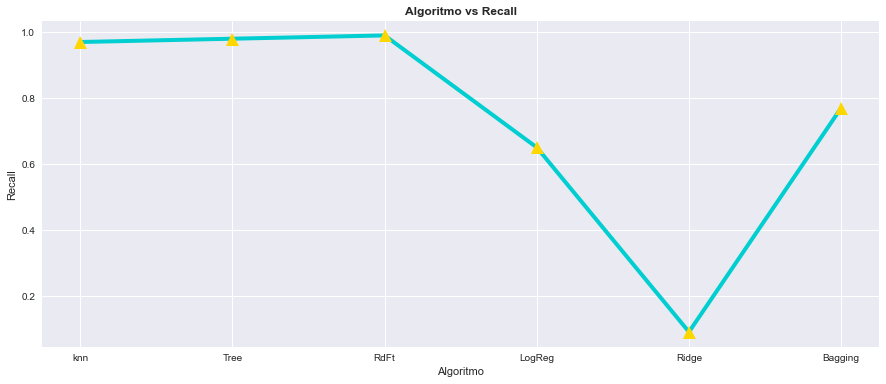

In [138]:
plt.figure(figsize=(15, 6))
plt.title("Algoritmo vs Recall", fontweight='bold')
plt.xlabel("Algoritmo")
plt.ylabel("Recall")
plt.plot(d.keys(),d.values(),marker='^',color='darkturquoise',linewidth=4,markersize=13,
         markerfacecolor='gold',markeredgecolor='slategray')
plt.show()

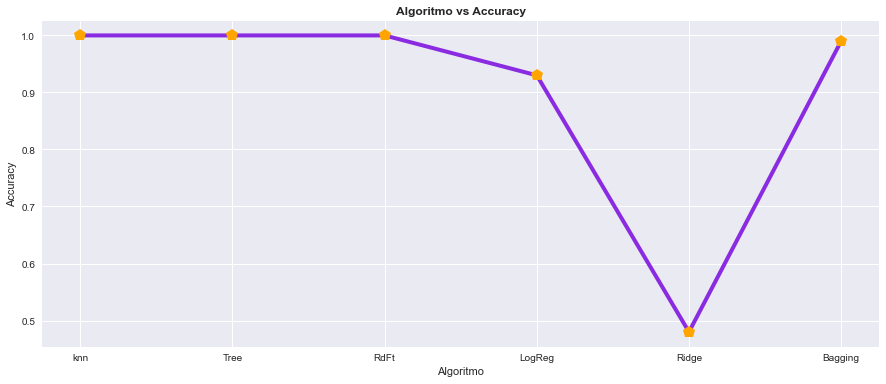

In [144]:
plt.figure(figsize=(15, 6))
plt.title("Algoritmo vs Accuracy", fontweight='bold')
plt.xlabel("Algoritmo")
plt.ylabel("Accuracy")
plt.plot(a.keys(),a.values(),marker='p',color='blueviolet',linewidth=4,markersize=13,
         markerfacecolor='orange',markeredgecolor='slategray')